<a href="https://colab.research.google.com/github/Rooban-Jeyasundar/ML_Regression_Project/blob/main/ML_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Member**  - ROOBAN . J

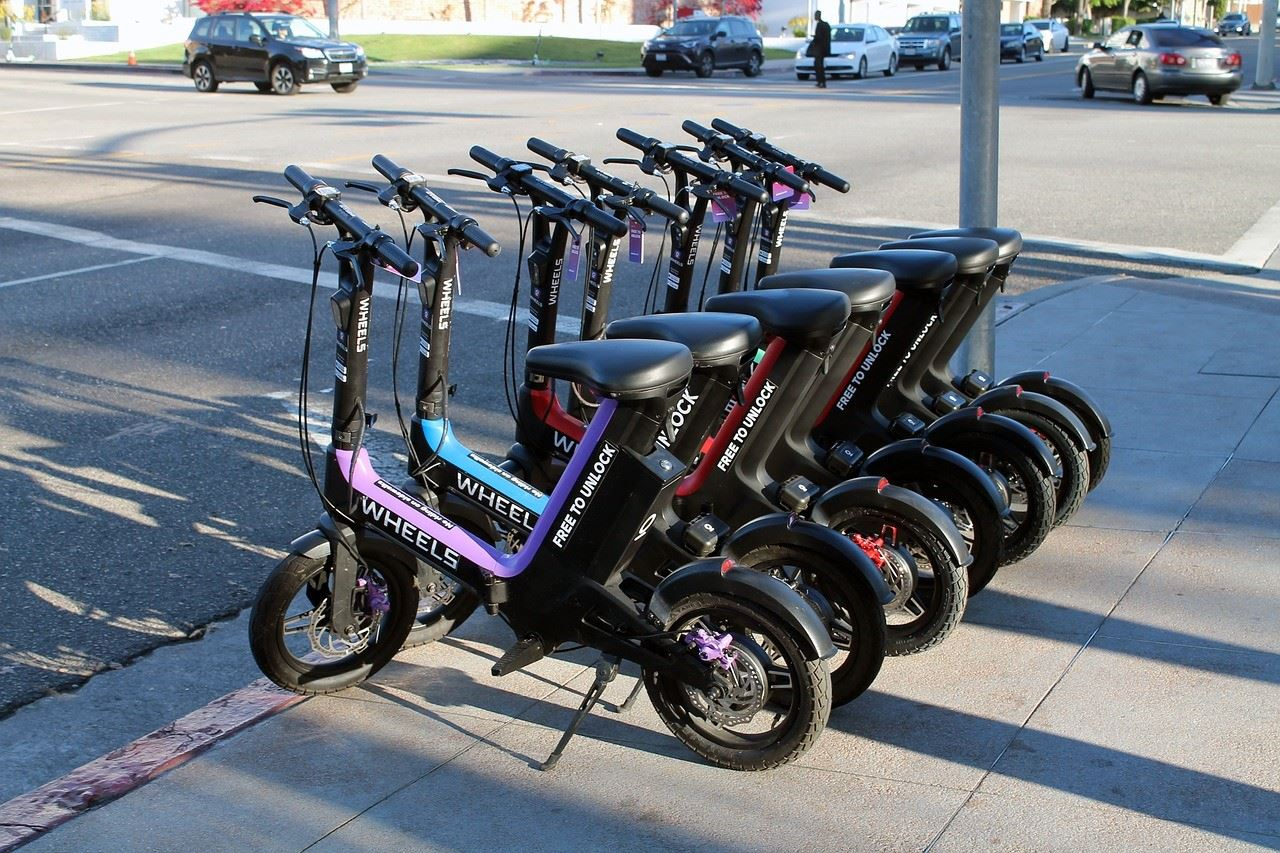

# **Project Summary -**

* Predicting the demand in renting the bike is the most common problem for those companies especially in highly populated metro cities. There are many factors that influence the demand like Time of Rent, Climate around etc..

* In this project, I have tried to develop a Regression based supervised machine learning model which is helpful to predict the demand of bikes on a period with all influential features.This will helps the companies to maintain their inventory and investments then plan for the pricing based on demand.


* The dataset which we got is from a bike sharing company in the city Seoul, It has bike rental information that includes details on the number of bikes rented, the time and date of the rental, and various weather and seasonality features, information on other relevant factors that could impact bike demand, such as holidays, functioning or non functioning day.

* First and foremost step is to preprocess the data to be consumable by a ML model to make most reliable prediction. Preprocessing includes cleaning the data and feature engineering steps. Then we have visualized the relations between the features (columns) using various charts.

* After that, I split the data into training and test data. Training data is used to train our ML model and Test data is used to validate the performance. Later I have experimented with various ML model techniques and hyperparameter tuning to find which model has utmost accuracy.

* Evaluation of performance was done by various evaluation metrics like mean absolute error, root mean squared error, and R-squared value. From all models  I have build, we compare the value to get the best prediction.


# **GitHub Link -**

https://github.com/Rooban-Jeyasundar/ML_Regression_Project.git

# **Problem Statement**


* Major Problem faced by any Bike sharing companies is to provide seamless availability of supply during the demand period. Currently, the culture of using rented bikes in metro cities has grown up, So maintaining the availability and accessibility becomes Key.

* Moto of this model building is to predict a most accurate model to provide the usable insights to the company. Then company takes actions based on the data to optimize their opertions and supply the bikes seamlessly to public when it needed.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [74]:
# Import Libraries

#Import Libraries for data cleaning and data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt  #for processing datetime columns

#Import libraries for scaling, transforming, and modeling processes
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV




In [75]:
#Import Evaluation Metrics from Sci-Kit Package
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss


### Dataset Loading

In [76]:
# Load Dataset
from google.colab import files
uploaded = files.upload()


Saving SeoulBikeData.csv to SeoulBikeData (1).csv


In [80]:
import io
bike_df = pd.read_csv((io.BytesIO(uploaded['SeoulBikeData (1).csv'])),encoding='unicode_escape')
print(bike_df.sample(10))

            Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
4345  31/05/2018                610     1             15.5           82   
4149  22/05/2018                 58    21             17.0           85   
6790  09/09/2018               1291    22             21.8           54   
5708  26/07/2018               1790    20             31.0           68   
7799  21/10/2018                724    23             11.8           56   
6440  26/08/2018                566     8             22.1           74   
433   19/12/2017                122     1             -2.0           72   
4901  23/06/2018                339     5             21.1           48   
2262  05/03/2018                 20     6              4.2           87   
7340  02/10/2018                  0    20             16.8           62   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
4345               1.5               513                       12.4   
4149               1.1          

### Dataset First View

In [81]:
# Dataset First Look
bike_df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [82]:
bike_df.tail(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [83]:
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Dataset Rows & Columns count

In [84]:
# Dataset Rows & Columns count
print(bike_df.shape)
print("No. of rows in the dataset : ",bike_df.shape[0])
print("No. of columns in the dataset : ",bike_df.shape[1])

(8760, 14)
No. of rows in the dataset :  8760
No. of columns in the dataset :  14


### Dataset Information

In [85]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [86]:
# Dataset Duplicate Value Count
print("Does data have any duplicate values ?",bike_df.duplicated())

print("The number of duplicate values in the data set is = ",len(bike_df[bike_df.duplicated()]))

Does data have any duplicate values ? 0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Length: 8760, dtype: bool
The number of duplicate values in the data set is =  0


* Duplicate values are the repeated values in the dataset which is not going to add any value in model building because model is going to analyse the same value multiple times. So we are removing the duplicates if any, by this we can save time and memory. In this dataset we don't any duplicate values.

#### Missing Values/Null Values

In [87]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


* The real-world data often has a lot of missing values. So handling missing data is very important during the preprocessing of the dataset because many machine learning algorithms do not support missing values and also it cause data corruption or failure to record data.

<Axes: >

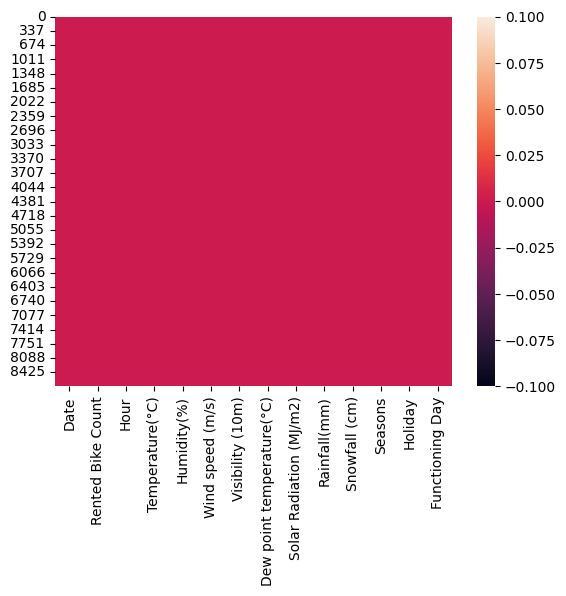

In [88]:
# Visualizing the missing values
# We're visualizing it on Heatmap
sns.heatmap(bike_df.isnull())

### What did you know about your dataset?

1. First of all from the name of the columns we know that this dataset have some attributes which influence the rental services of the bike in a city.

2. This dataset contains 8760 observations(rows) and 14 features(Columns).

3. For a year we have 365 days mostly and for a day we have 24 hours, so if we multiply the 24 and 365 we get our 8760 observations.

4. In this dataset we don't have any null values and duplicate values. So dataset has all values as Unique Values.

5. Regarding Datatype of the columns, most of them are int and float type and object type also there in the dataset.

## ***2. Understanding Your Variables***

In [89]:
# Dataset Columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [90]:
# Dataset Describe
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description

## Breakdown of Our Features:

**Date** : The date of the day, from all of 365 days this data is in range (01/12/2017 to 30/11/2018) in DD/MM/YYYY format (type : str) . we need to convert into datetime format.

**Rented Bike Count** : Number of rented bikes per hour which is our dependent variable and we have to predict on this basis only (type : int)

**Hour**: The hour of the day, starting from 0-23 it's in a digital time format, we need to convert it into category data type. (type : int)

**Temperature(°C)**: Temperature in Celsius (type : Float)

**Humidity(%)**: Humidity in the air in % Percentage (type : int)

**Wind speed (m/s)** : Speed of the wind in m/s (type : Float)

**Visibility (10m)**: Visibility in m  (type : int)

**Dew point temperature(°C)**: Temperature at the beginning of the day  (type : Float)

**Solar Radiation (MJ/m2)**: Sun contribution  (type : Float)

**Rainfall(mm)**: Amount of raining in mm  (type : Float)

**Snowfall (cm)**: Amount of snowing in cm  (type : Float)

**Seasons**: Season of the year, there are only 4 season's in data   (type : str)

**Holiday**: If that particular day is holiday period or not   (type : str)

**Functioning Day**: If that particular day is a working day or not   (type : str)



### Check Unique Values for each variable.

In [91]:
# Check Unique Values for each variable.
# Checking the count of unique variables in each columns
Columns = bike_df.columns
for i in Columns:
  print(f"Unique value counts in {i} is", bike_df[i].nunique())

Unique value counts in Date is 365
Unique value counts in Rented Bike Count is 2166
Unique value counts in Hour is 24
Unique value counts in Temperature(°C) is 546
Unique value counts in Humidity(%) is 90
Unique value counts in Wind speed (m/s) is 65
Unique value counts in Visibility (10m) is 1789
Unique value counts in Dew point temperature(°C) is 556
Unique value counts in Solar Radiation (MJ/m2) is 345
Unique value counts in Rainfall(mm) is 61
Unique value counts in Snowfall (cm) is 51
Unique value counts in Seasons is 4
Unique value counts in Holiday is 2
Unique value counts in Functioning Day is 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [92]:
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [93]:
# Write your code to make your dataset analysis ready.

# We are changing our Column names into more useable format, because it looks clumsy with some additional unit with it.

bike_df = bike_df.rename(columns={'Rented Bike Count' : 'Rented_Bike_count',
                        'Temperature(°C)':'Temperature',
                        'Humidity(%)' : 'Humidity',
                        'Wind speed (m/s)' : 'Wind_speed',
                        'Visibility (10m)' : 'Visibility',
                        'Dew point temperature(°C)' : 'Dew_point_temperature',
                        'Solar Radiation (MJ/m2)' : 'Solar_Radiation',
                        'Rainfall(mm)' : 'Rainfall',
                        'Snowfall (cm)' : 'Snowfall',
                        'Functioning Day' : 'Functioning_Day'})
bike_df.columns

Index(['Date', 'Rented_Bike_count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [94]:
# we are breaking the whole date column into day, month and year for our better convenience in analysing
bike_df['Date'] = bike_df['Date'].str.replace('-',"/")
bike_df['Date'] = bike_df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))


In [95]:
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()

In [96]:
# Creating a new column to store the value as weekend or weekdays in binary format

bike_df['weekday/weekend'] = bike_df['day'].apply(lambda x : 1 if x=="Saturday" or x=="Sunday" else 0)

# now we're dropping day, month and year colour because it doesn't affect any process
bike_df= bike_df.drop (columns = ['year','Date', 'day'])

In [97]:
bike_df.head(2)

,Rented_Bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekday/weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [98]:
bike_df['weekday/weekend'].value_counts()

0    6264
1    2496
Name: weekday/weekend, dtype: int64

In [99]:
# Changing some int type columns into category columns for better usability

Changing_Columns = ['Hour', 'month', 'weekday/weekend']
for i in Changing_Columns:
  bike_df[i]=bike_df[i].astype('category')

In [100]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekday/weekend        8760 non-null   c

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**Exploratory Data Analysis on the dataset**


* Exploratory Data Analysis (EDA) refers to the method of studying and exploring record sets to apprehend their predominant traits, discover patterns, locate outliers, and identify relationships between variables. EDA is normally carried out as a preliminary step before undertaking extra formal statistical analyses or modeling.

**Univariate Analysis**

* Univariate Analysis is statistical analysis technique that involves analysing and describing a single variable in a dataset and also involving finding patterns in that data.

**Analysis on Variables**

* The explanatory variable (or the independent variable) always belongs on the x-axis. The response variable (or the dependent variable) always belongs on the y-axis which means values will change depending on another variable.

* Categorical variables require special attention in regression analysis because, unlike dichotomous or continuous variables, they cannot by entered into the regression equation just as they are. Instead, they need to be recoded into a series of variables which can then be entered into the regression model.

* In this dataset we have multiple independent columns and also have Rented_Bike_count as dependent one. With the help of some visualizations we will analyse the relationships between the attributes.

* First we analyse on Categorical variable then move towards Numerical variable.

#### Chart - 1

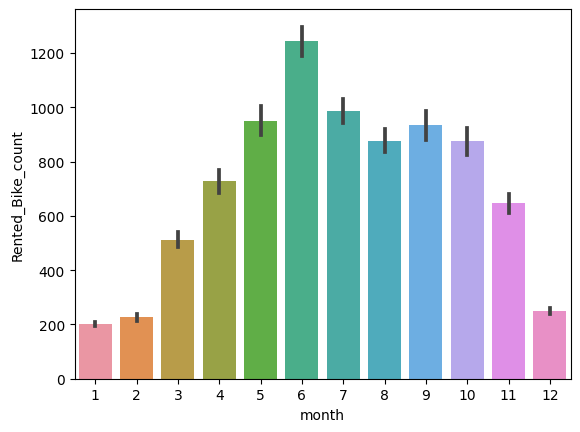

In [101]:
# Chart - 1 visualization code
# Creating visualization on month column

sns.barplot(data=bike_df,x='month',y='Rented_Bike_count').set_title=('Count of rented bikes on month basis')

##### 1. Are there any insight(s) found from the chart?

*  From the above plot, we get that the count of rented bike were high on summer time which is around the months of May-July.

#### Chart - 2

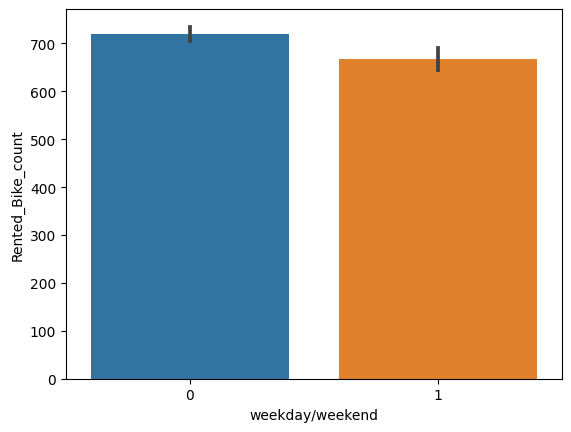

In [102]:
# Chart - 2 visualization code

sns.barplot(data=bike_df,x='weekday/weekend',y='Rented_Bike_count').set_title=('Count of bikes on weekday/weekend')

##### 1. Are there any insight(s) found from the chart?

* From the chart we clearly see that the demand of bikes were high in weekdays.

#### Chart - 3

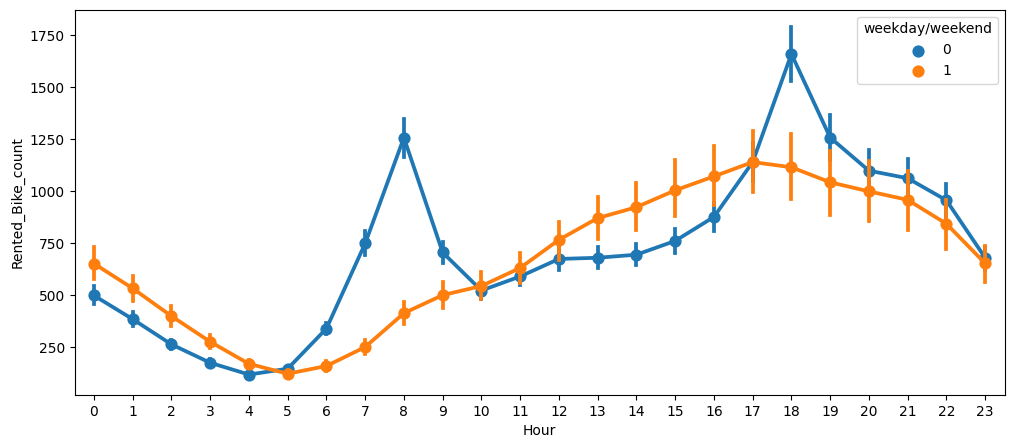

In [103]:
# Chart - 3 visualization code
fig, ax = plt.subplots(figsize=(12, 5))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_count',hue='weekday/weekend',ax=ax)
ax.set_title=('Count of bikes rented on hour basis')

##### 1. Are there any insight(s) found from the chart?

* In the above chart blue line represents the weekdays which shows the demand is high on two points which is 7-9 AM and 5-7 PM that might be to and fro travel from office to home.

* Whereas Orange line represents the demand on weekends which shows the count of bike rental is increasing at evening time (3-7 PM)


#### Chart - 4

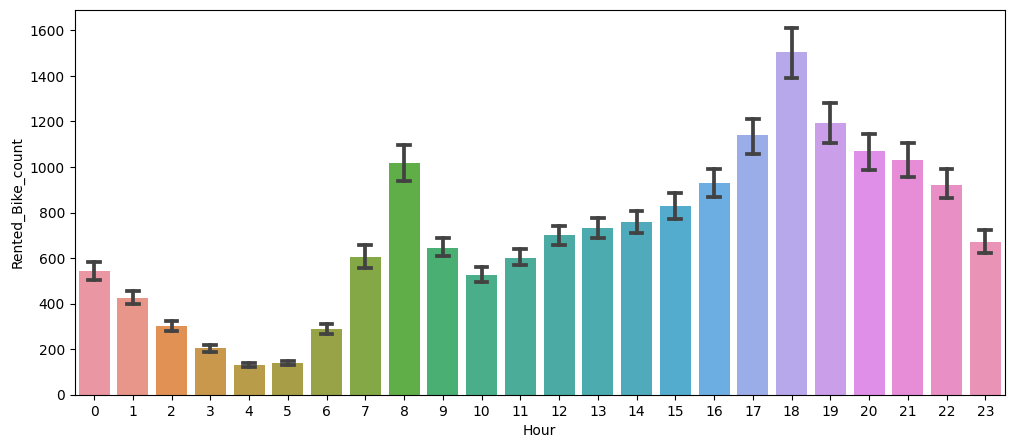

In [104]:
# Chart - 4 visualization code
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_count',ax=ax,capsize=0.3)
ax.set_title=('Count of bikes rented on hour basis')


* From the plot we came to know that use of rented bikes are steadily increasing in the points like (7-9 AM) and (5-7 PM).

#### Chart - 5

Text(0.5, 1.0, 'Count of bikes rented on Functioning_Day')

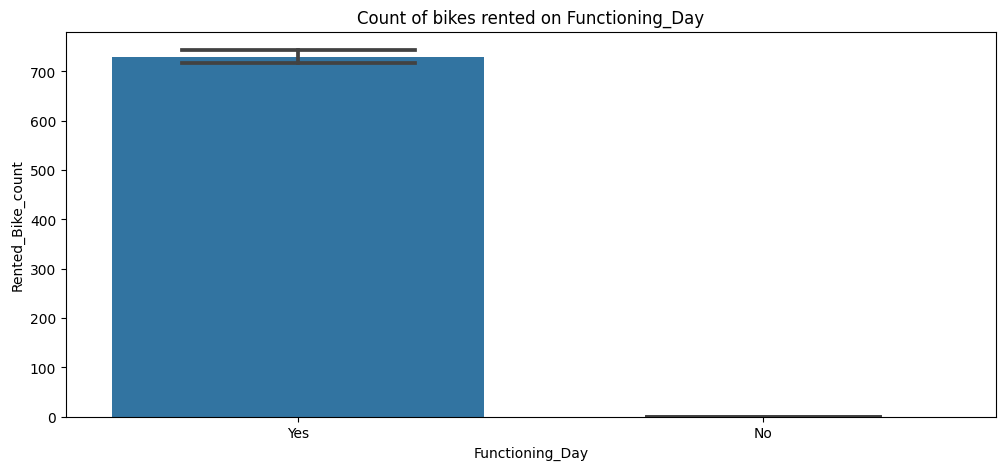

In [105]:
# Chart - 5 visualization code

fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(data=bike_df,x='Functioning_Day',y='Rented_Bike_count',ax=ax,capsize=.5)
ax.set_title('Count of bikes rented on Functioning_Day')

Text(0.5, 1.0, 'Count of bikes rented on Functioning_Day')

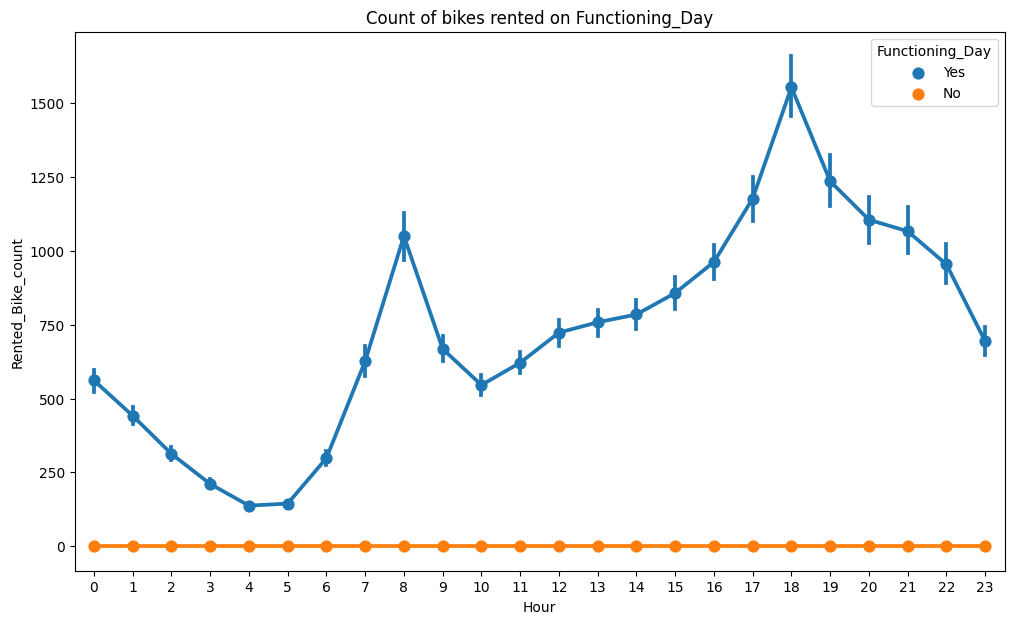

In [106]:
# Chart - 6 visualization code

fig, ax = plt.subplots(figsize=(12, 7))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_count',hue='Functioning_Day',ax=ax)
ax.set_title('Count of bikes rented on Functioning_Day')

##### 1. Are there any insight(s) found from the chart?

* From the charts, we clear see that there is no demand for rented bikes on Non-Functioning Day.

#### Chart - 7

Text(0.5, 1.0, 'Season wise rented bike counts')

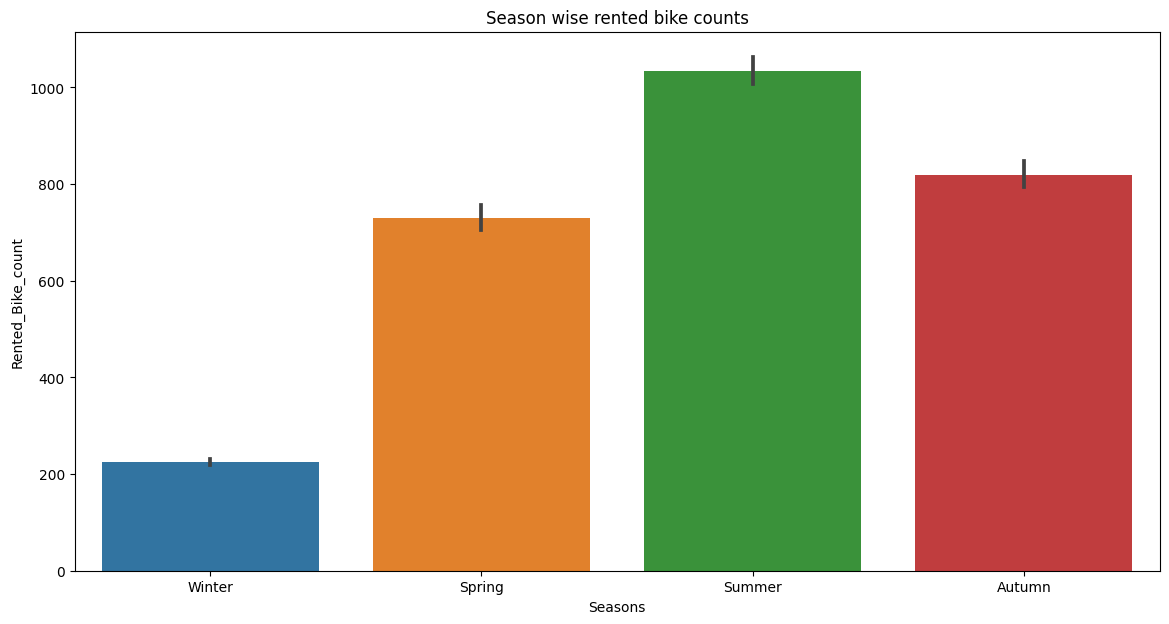

In [107]:
# Chart - 7 visualization code

fig,ax=plt.subplots(figsize=(14,7))
sns.barplot(data=bike_df,x='Seasons',y='Rented_Bike_count',ax=ax)
ax.set_title('Season wise rented bike counts')

#### Chart - 8

Text(0.5, 1.0, 'Count of bikes rented on different Seasons')

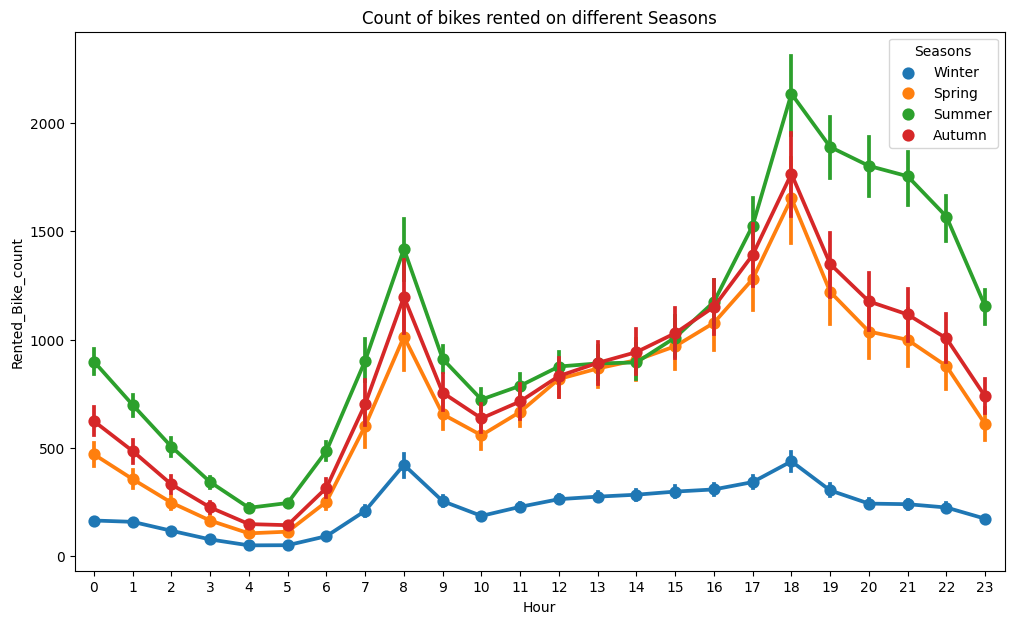

In [108]:
# Chart - 8 visualization code

fig, ax = plt.subplots(figsize=(12, 7))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_count',hue='Seasons',ax=ax)
ax.set_title('Count of bikes rented on different Seasons')

##### 1. Are there any insight(s) found from the chart?

* From the above charts we clearly see that the demands were high in the summer season whereas it was very low in winter season.

* In the summer also peak times are as usual office timings which is 7-9 AM and 5-7 PM.

#### Chart - 9

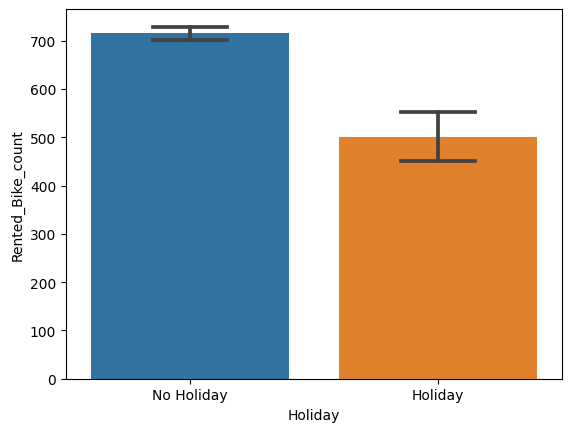

In [109]:
# Chart - 9 visualization code

sns.barplot(data=bike_df,x='Holiday',y='Rented_Bike_count',capsize=.3).set_title=('Count of bikes on Holidays')

#### Chart - 10

Text(0.5, 1.0, 'Count of hour-wise bikes rented on Holidays')

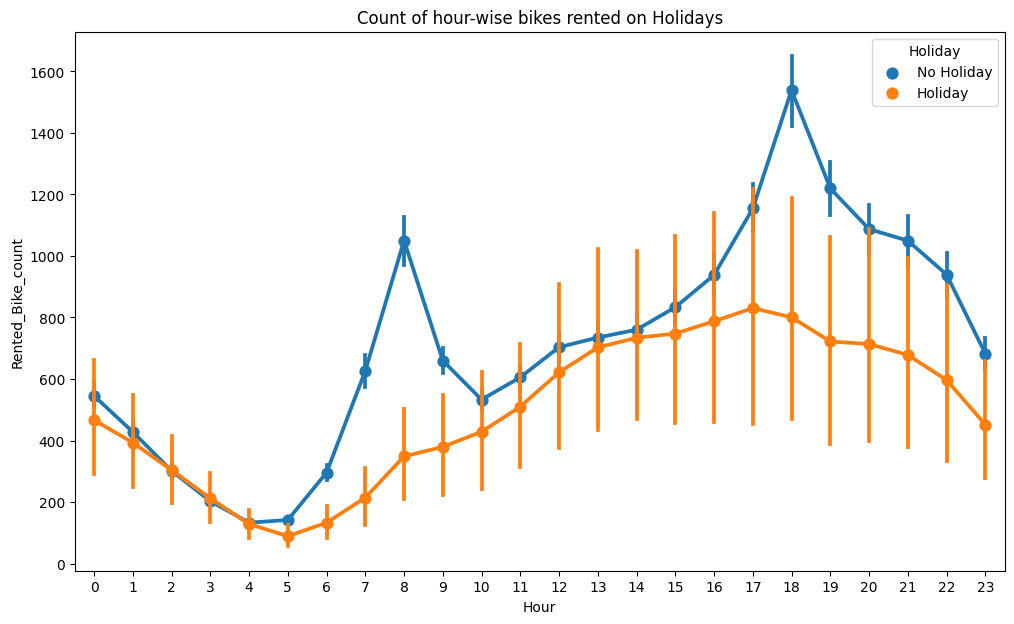

In [110]:
# Chart - 10 visualization code

fig, ax = plt.subplots(figsize=(12, 7))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_count',hue='Holiday',ax=ax)
ax.set_title('Count of hour-wise bikes rented on Holidays')

##### 1. Are there any insight(s) found from the chart?

* From the above barplot and pointplot, we clearly see that use of rented bikes are higher on Non-holidays and in holidays usage is high on hours around 2-8 PM.

#### Analysis of Numerical variables on Distribution plots

In [111]:
# Chart - 11 visualization code
numerical_columns = list(bike_df.select_dtypes(['int64','float64']).columns)
numerical_features = pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

<ipython-input-112-7f3ee7c08662>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=bike_df[col])
<ipython-input-112-7f3ee7c08662>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=bike_df[col])
<ipython-input-112-7f3ee7c08662>:3: UserWarning: 

`distplot` is a deprecated function and will be r

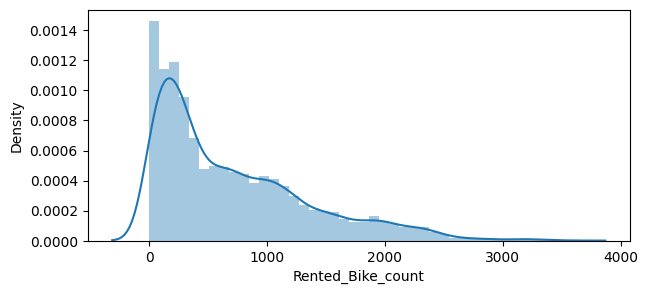

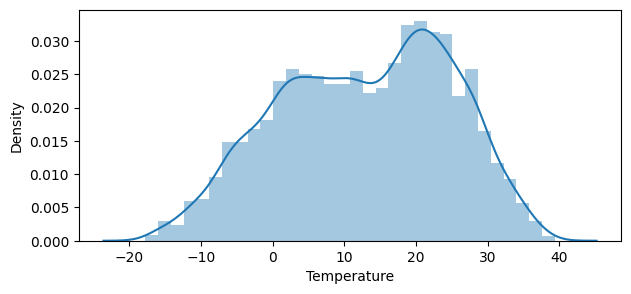

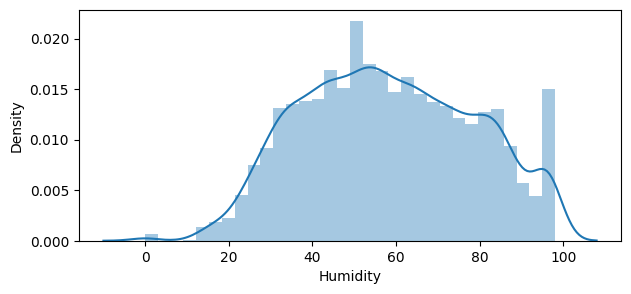

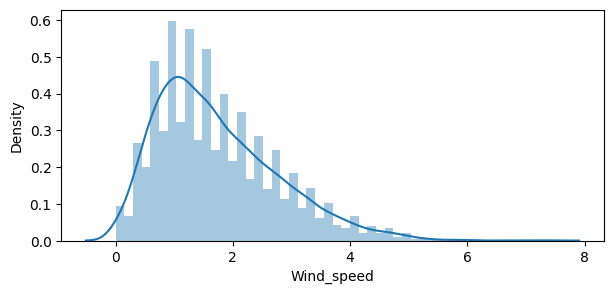

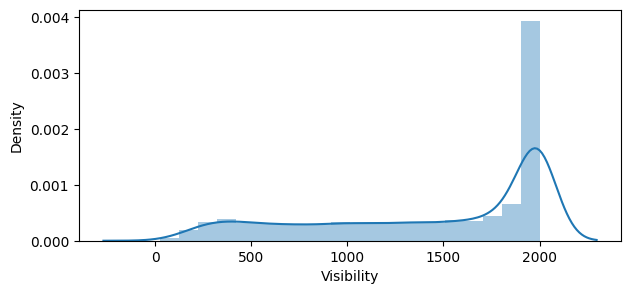

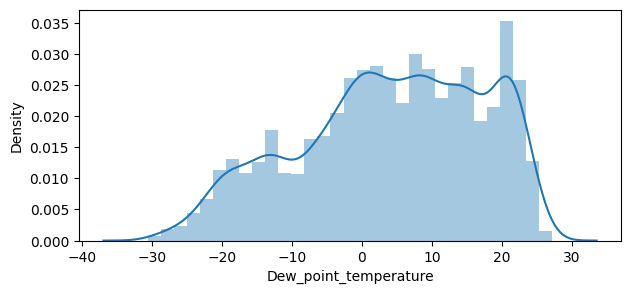

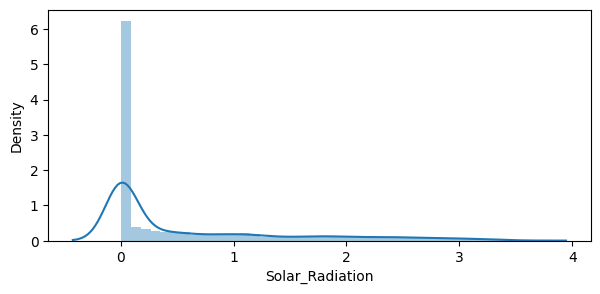

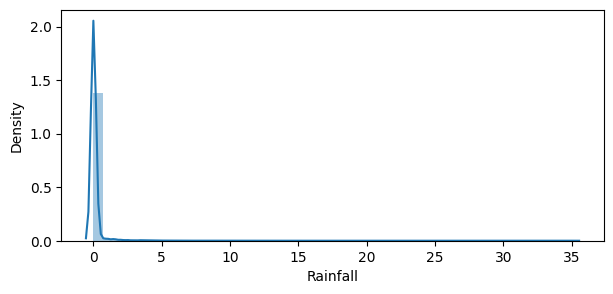

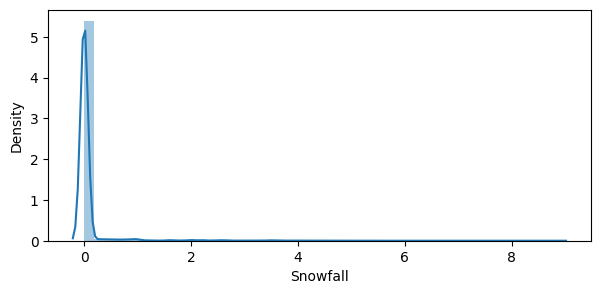

In [112]:
for col in numerical_features :
  plt.figure(figsize=(7,3))
  sns.distplot(x=bike_df[col])
  plt.xlabel(col)
plt.show()

##### 1. Are there any insight(s) found from the chart?

From the above displot we found that how much skewness are there in the data,


1.   Right Skewed Columns - Rented_Bike_count, Wind speed, Solar radiation, Snowfall, Rainfall  
2.   Left Skewed Columns - Visibility, Dew point temperature


**Now we have to find how much numerical features are related to dependent variable.**

#### Numerical Columns VS Rented_Bike_count

<ipython-input-113-c3b258d51c5e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_df.groupby('Temperature').mean()['Rented_Bike_count'].plot()


<Axes: xlabel='Temperature'>

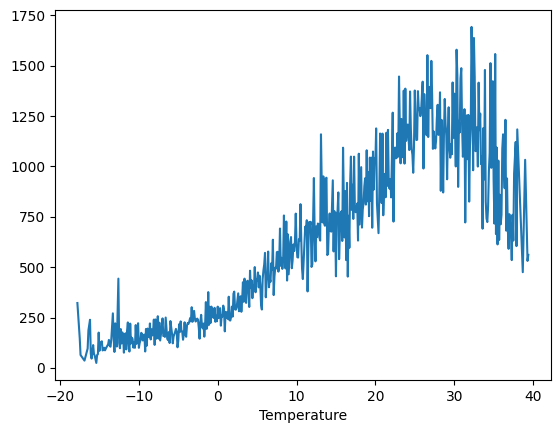

In [113]:
# Visualization code to analyse the relationship b/w "Rented_Bike_count" and "Temperature"

bike_df.groupby('Temperature').mean()['Rented_Bike_count'].plot()

##### 1. Are there any insights that lead to analyse? Justify with specific reason.



*  From the above plot we get that the people like to rent the bikes mostly when the temperature is around 25 degree celsius.



#### Chart - 13

<ipython-input-114-592e2749980c>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_df.groupby('Solar_Radiation').mean()['Rented_Bike_count'].plot()


<Axes: xlabel='Solar_Radiation'>

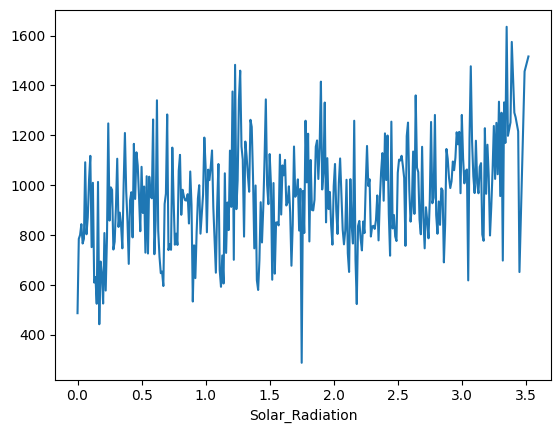

In [114]:
# Visualization code to plot and analyse the relationship b/w "Rented_Bike_count" and "Solar Radiation"

bike_df.groupby('Solar_Radiation').mean()['Rented_Bike_count'].plot()


##### 1. Are there any insights that lead to analyse? Justify with specific reason.



*   From the above plot we see that, amount of rented bikes is huge when the solar radiation, the value is around 1000.





<ipython-input-115-961246e45791>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_df.groupby('Snowfall').mean()['Rented_Bike_count'].plot()


<Axes: xlabel='Snowfall'>

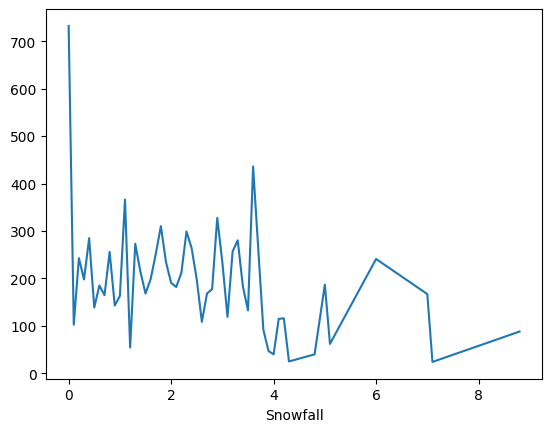

In [115]:
# Visualization code to plot and analyse the relationship b/w "Rented_Bike_count" and " Snowfall "

bike_df.groupby('Snowfall').mean()['Rented_Bike_count'].plot()

### 1. Are there any insights that lead to analyse? Justify with specific reason.


* We can see the plot shows that count of rented bikes are High when snowfall is Low and Moderate when snowfall is Average then Low when snowfall is above 4 cm

<ipython-input-116-f8f9d8628302>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_df.groupby('Rainfall').mean()['Rented_Bike_count'].plot()


<Axes: xlabel='Rainfall'>

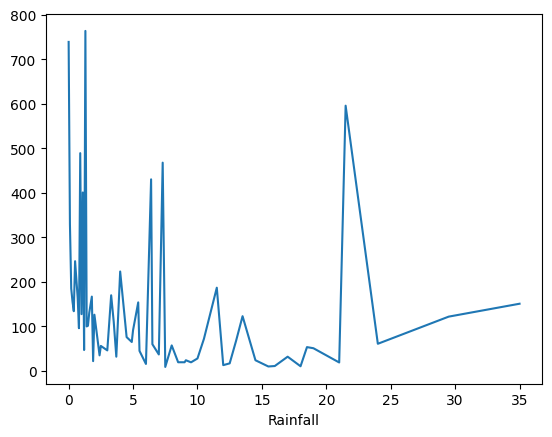

In [116]:
# Visualization code to plot and analyse the relationship b/w "Rented_Bike_count" and " Rainfall "

bike_df.groupby('Rainfall').mean()['Rented_Bike_count'].plot()

### 1. Are there any insights that lead to analyse? Justify with specific reason.

* From the above plot we see that the count of bike rented are distributed in various amount of rainfall when the fall is low the counts are high likewise in and around 20mm rainfall also the count of bike rent is increasing.

<ipython-input-117-6de72250d623>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_df.groupby('Wind_speed').mean()['Rented_Bike_count'].plot()


<Axes: xlabel='Wind_speed'>

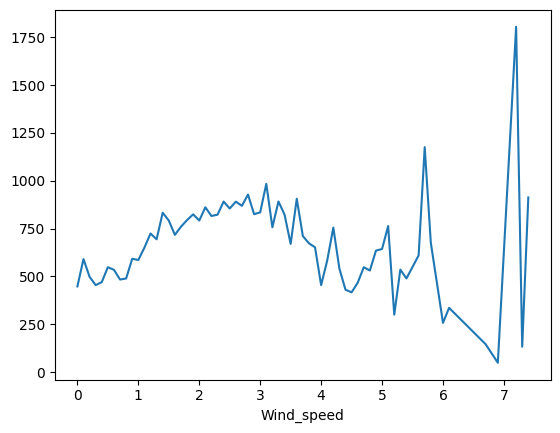

In [117]:
# Visualization code to plot and analyse the relationship b/w "Rented_Bike_count" and " Wind_speed "

bike_df.groupby('Wind_speed').mean()['Rented_Bike_count'].plot()

### 1. Are there any insights that lead to analyse? Justify with specific reason.

* From the above plot we see that the count of bikes rented are uniformly distributed in all different wind speeds and the counts are increased when windspeed was around 7 m/s, Which means people love ride bikes in windy conditions.

**REGRESSION PLOT**



*   Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships. So that plots are used to analyse the relationships between the attributes of this dataset.




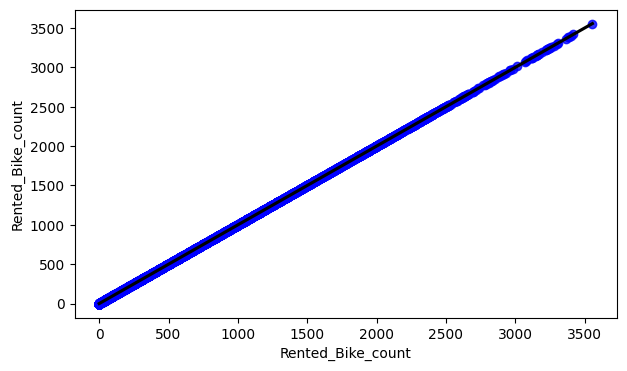

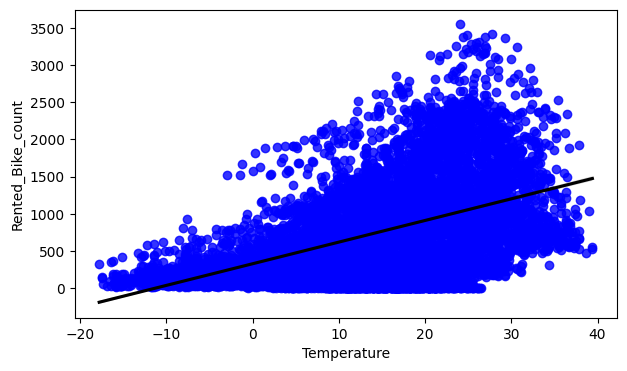

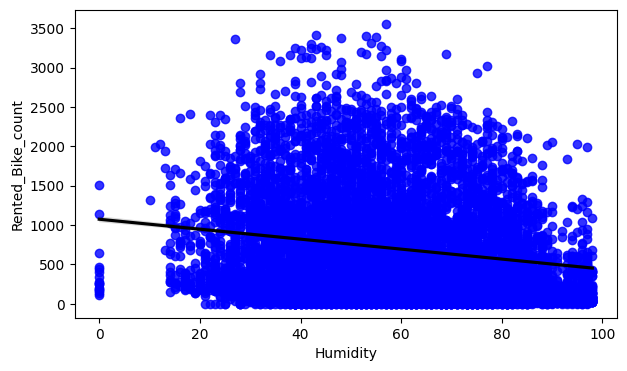

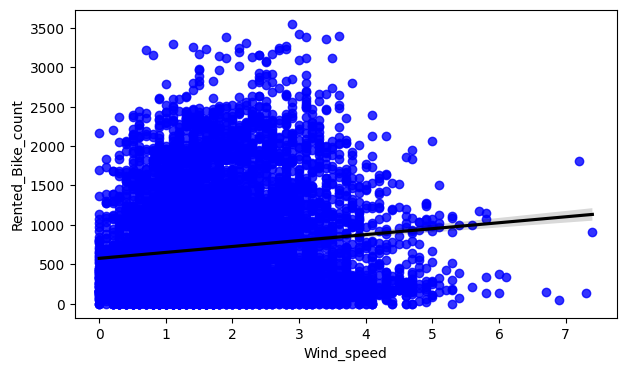

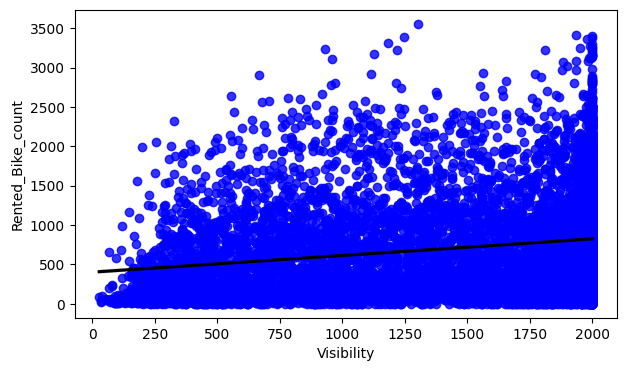

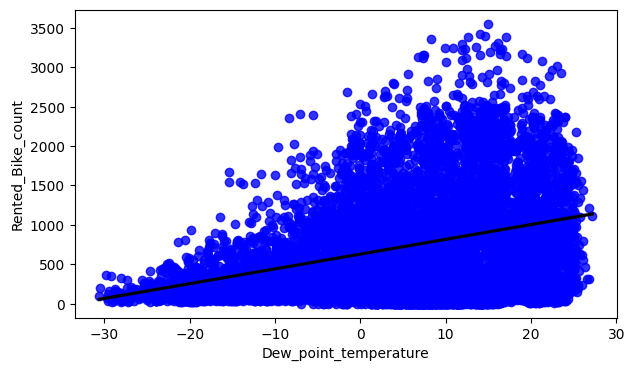

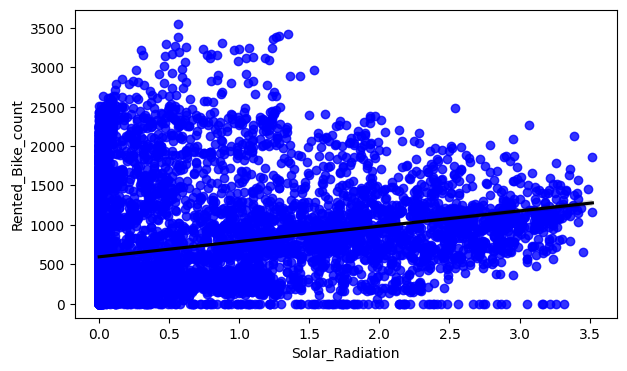

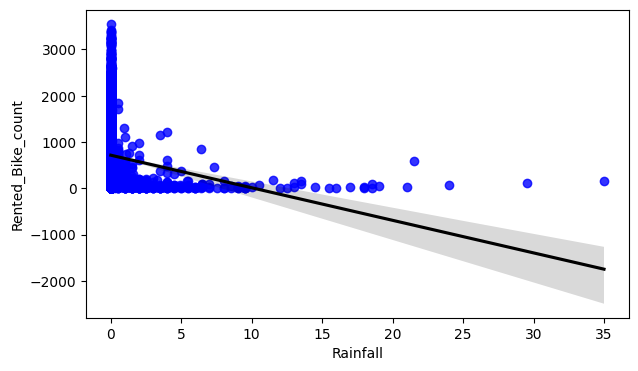

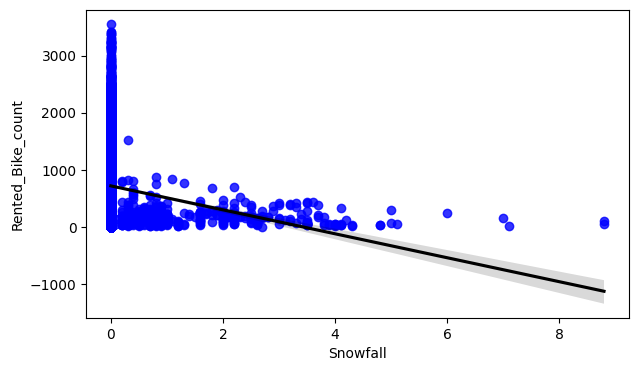

In [118]:
#Creating visualization of regression plot for all the numerical features

for columns in numerical_features:
  fig,ax = plt.subplots(figsize=(7,4))
  sns.regplot(x=bike_df[columns], y=bike_df['Rented_Bike_count'],scatter_kws={'color' : 'blue'}, line_kws={'color' : 'black'})

**What is/are the insight(s) found from the chart?**



*   From these plots we clearly see that the columns like Temperature, Wind speed, visibility, Dew point temperature, Solar radiation are positively related to the Target variable "Rented_Bike_count"
*   Likewise the variables like Rainfall, Snowfall, Humidity are negatively related to the target variable which means the count decreases when the value of feature increases.



**Normalise the Target variable column data**

* Data normalization is a technique used in data mining to transform the values of a dataset into a common scale. This is important because many machine learning algorithms are sensitive to the scale of the input features and can produce better results when the data is normalized.

* It involves in transforming the data like converting the source data into other formats which allows to process data effectively.

* The main purpose of data normalization is to minimise or even exclude the duplicate values.

<ipython-input-119-2ba5e25f7902>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot=sns.distplot(bike_df['Rented_Bike_count'],hist=True)


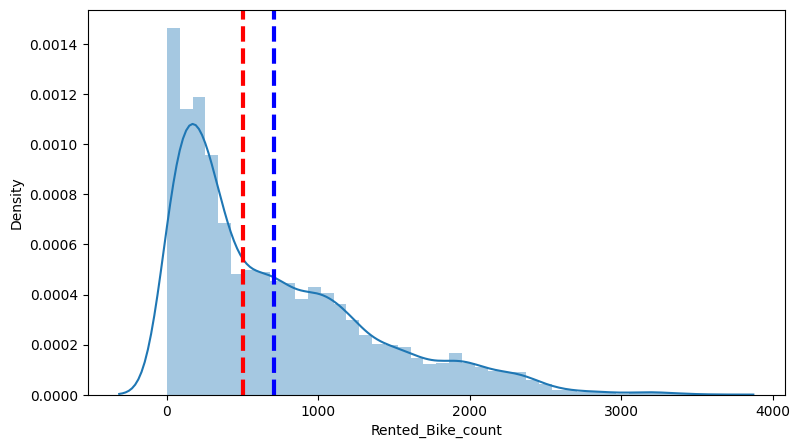

In [119]:
# Distribution plot of rented bike count
plt.figure (figsize=(9,5))
plt.xlabel("Rented_Bike_Count")
plt.ylabel('Density')
plot=sns.distplot(bike_df['Rented_Bike_count'],hist=True)
plot.axvline(bike_df['Rented_Bike_count'].mean(),color='blue',linestyle='dashed',linewidth=3)
plot.axvline(bike_df['Rented_Bike_count'].median(),color='red',linestyle='dashed',linewidth=3)
plt.show()

* The above graph shows that, Rented_Bike_count has moderate amount of right skewness. Since the assumption of linear regression is that the distribution of dependent variable has to be normal, so we should perform some operation to make it normal.

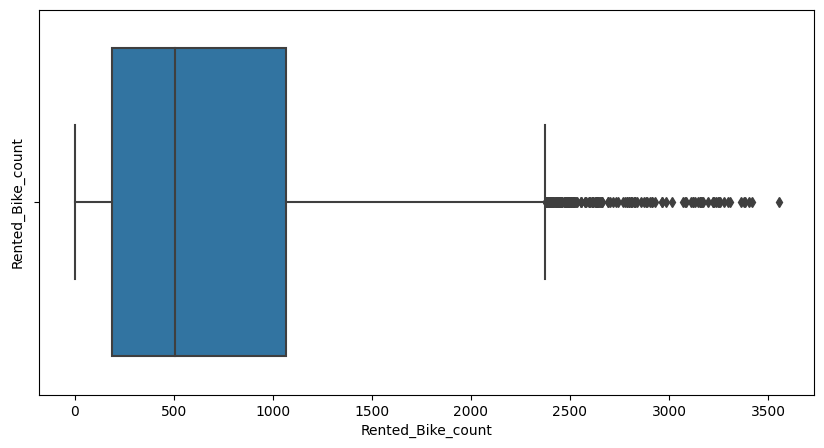

In [120]:
#Finding the outliers and its treatment
#Boxplot for target value to find outliers
plt.figure(figsize=(10,5))
sns.boxplot(x=bike_df['Rented_Bike_count'])
plt.ylabel('Rented_Bike_count')
plt.show()

In [121]:
#outliers treatment
bike_df.loc[bike_df['Rainfall']>=4,'Rainfall']=4
bike_df.loc[bike_df['Solar_Radiation']>=2.5,'Solar_Radiation']=2.5
bike_df.loc[bike_df['Snowfall']>=2,'Snowfall']=2
bike_df.loc[bike_df['Wind_speed']>=4,'Wind_speed']=4

<ipython-input-122-f4e4a397a848>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot=sns.distplot(np.sqrt(bike_df['Rented_Bike_count']),hist=True)


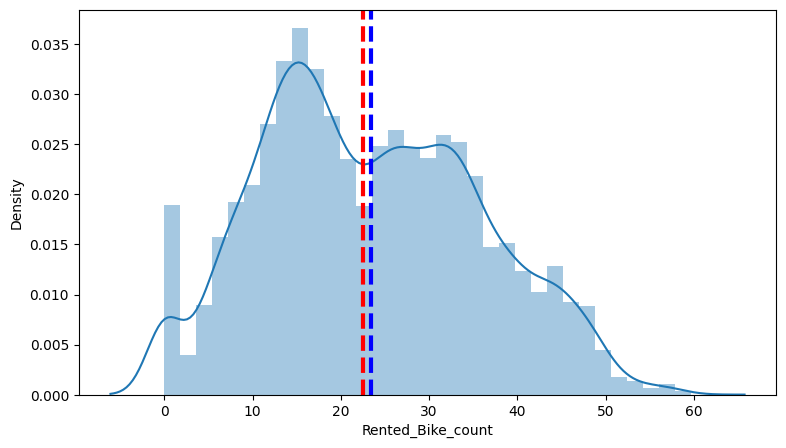

In [122]:
#To improve the skewness we are applying square root to Rented bike count
plt.figure (figsize=(9,5))
plt.xlabel("Rented_Bike_Count")
plt.ylabel('Density')
plot=sns.distplot(np.sqrt(bike_df['Rented_Bike_count']),hist=True)
plot.axvline(np.sqrt(bike_df['Rented_Bike_count']).mean(),color='blue',linestyle='dashed',linewidth=3)
plot.axvline(np.sqrt(bike_df['Rented_Bike_count']).median(),color='red',linestyle='dashed',linewidth=3)
plt.show()

* Here we get after applying square root to the skewed Rented_Bike_count, here we get almost normal distribution.

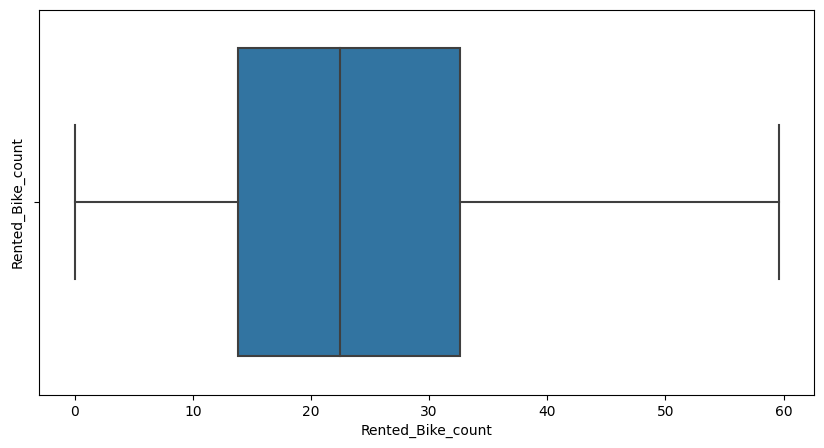

In [123]:
#After applying the sqrt we are checking still are there any outliers
plt.figure(figsize=(10,5))
sns.boxplot(x=np.sqrt(bike_df['Rented_Bike_count']))
plt.ylabel('Rented_Bike_count')
plt.show()

* After applying square root, we clearly see that there are no outliers.

**Checking the Correlation between variables**

In [124]:
bike_df.corr()

<ipython-input-124-ec47957aa79f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bike_df.corr()


,Rented_Bike_count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
Rented_Bike_count,1.000000,0.538558,-0.199780,0.131549,0.199280,0.379788,0.265658,-0.174224,-0.160917
Temperature,0.538558,1.000000,0.159371,-0.031368,0.034794,0.912798,0.350679,0.061274,-0.263134
Humidity,-0.199780,0.159371,1.000000,-0.341432,-0.543090,0.536894,-0.467236,0.331631,0.087086
Wind_speed,0.131549,-0.031368,-0.341432,1.000000,0.173683,-0.174233,0.342995,-0.038813,0.008140
Visibility,0.199280,0.034794,-0.543090,0.173683,1.000000,-0.176630,0.151105,-0.238378,-0.109306
Dew_point_temperature,0.379788,0.912798,0.536894,-0.174233,-0.176630,1.000000,0.090541,0.168386,-0.195743
Solar_Radiation,0.265658,0.350679,-0.467236,0.342995,0.151105,0.090541,1.000000,-0.105920,-0.080470
Rainfall,-0.174224,0.061274,0.331631,-0.038813,-0.238378,0.168386,-0.105920,1.000000,-0.002297
Snowfall,-0.160917,-0.263134,0.087086,0.008140,-0.109306,-0.195743,-0.080470,-0.002297,1.000000


In [125]:
bike_df.columns

Index(['Rented_Bike_count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekday/weekend'],
      dtype='object')

In [126]:
#Assigning the columns to X and Y variables

X = bike_df [['Temperature','Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall']]
Y = bike_df['Rented_Bike_count']


In [127]:
#importing the stats module and add a constant columns
import statsmodels.api as sm
X = sm.add_constant(X)
X

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,1.0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1.0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,1.0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,1.0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,1.0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,1.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,1.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,1.0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


##**Checking of Correlation via OLS method**

**Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable**

In [128]:
#fit an OLS Model
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_count   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     744.3
Date:                Mon, 02 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:43:18   Log-Likelihood:                -66827.
No. Observations:                8760   AIC:                         1.337e+05
Df Residuals:                    8751   BIC:                         1.337e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   699.4173    106.562      6.563      0.000     490.531     908.304
Temperature              40.3283      4.160      9.695      0.000      32.175      48.482
Humidity                 -8.5913      1.193     -7.203      0.000     -10.929      -6.253
Wind_speed               62.4552      5.951     10.495      0.000      50.790      74.121
Visibility               -0.0137      0.011     -1.254      0.210      -0.035       0.008
Dew_point_temperature    -5.0068      4.394     -1.139      0.255     -13.621       3.607
Solar_Radiation        -124.1270      9.254    -13.413      0.000    -142.267    -105.987
Rainfall               -162.0914     11.237    -14.425      0.000    -184.118    -140.065
Snowfall                 53.2592     19.061      2.794      0.005      15.895      90.623
==============================================================================
Omnibus:                      965.203   Durbin-Watson:                   0.344
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1618.702
Skew:                           0.770   Prob(JB):                         0.00
Kurtosis:                       4.436   Cond. No.                     3.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* **From the above model results we can see how every stastic value is resulted to the data and thier variance respective to each other. Some of them are.,**

1. **R sqauare and Adj Square are near to each other. 40% of variance in the Rented Bike count is  explained by the model.**
2.  **For F statistic , P value is less than 0.05 for 5% level of significance.**
3. **P value of dew point temp and visibility are very high and they are not significant.**



In [129]:
X.corr()

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,1.000000,0.159371,-0.031368,0.034794,0.912798,0.350679,0.061274,-0.263134
Humidity,NaN,0.159371,1.000000,-0.341432,-0.543090,0.536894,-0.467236,0.331631,0.087086
Wind_speed,NaN,-0.031368,-0.341432,1.000000,0.173683,-0.174233,0.342995,-0.038813,0.008140
Visibility,NaN,0.034794,-0.543090,0.173683,1.000000,-0.176630,0.151105,-0.238378,-0.109306
Dew_point_temperature,NaN,0.912798,0.536894,-0.174233,-0.176630,1.000000,0.090541,0.168386,-0.195743
Solar_Radiation,NaN,0.350679,-0.467236,0.342995,0.151105,0.090541,1.000000,-0.105920,-0.080470
Rainfall,NaN,0.061274,0.331631,-0.038813,-0.238378,0.168386,-0.105920,1.000000,-0.002297
Snowfall,NaN,-0.263134,0.087086,0.008140,-0.109306,-0.195743,-0.080470,-0.002297,1.000000


#### Chart - 14 - Correlation Heatmap

* It is a type of graphical representation that displays the correlation between the variables using a matrix.

<ipython-input-130-f44402e53da9>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bike_df.corr(),annot=True)


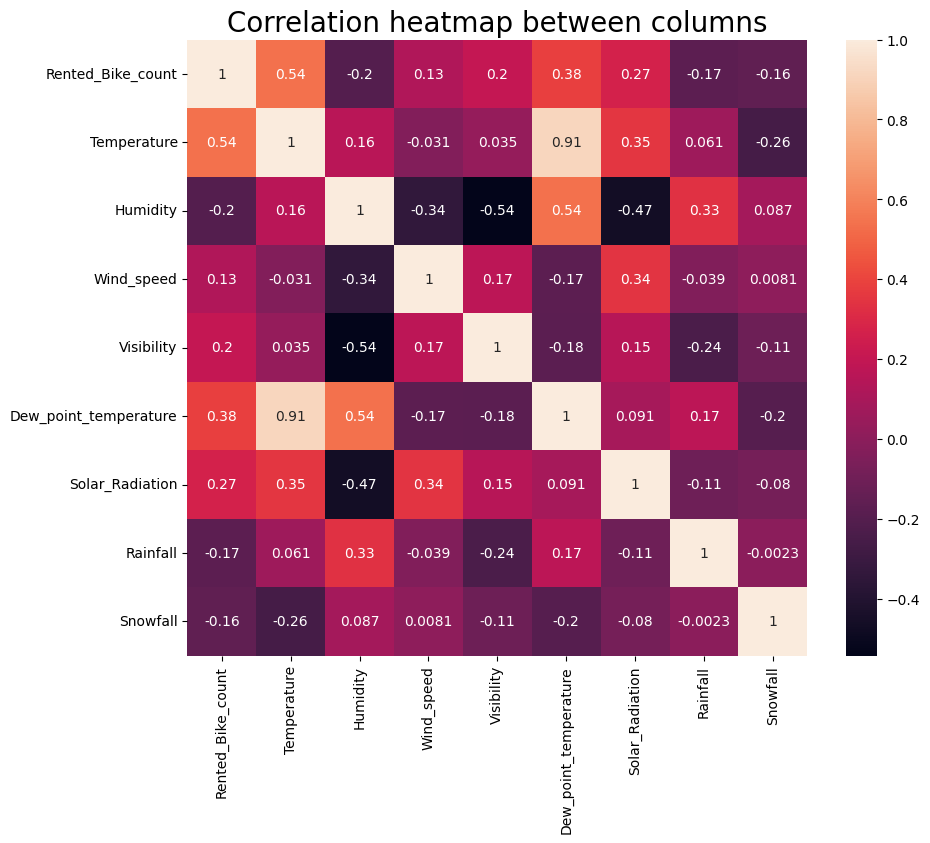

In [130]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,8))

#creating correlation heatmap with numeric values
sns.heatmap(bike_df.corr(),annot=True)

#creating visualization and setting title
plt.title('Correlation heatmap between columns',fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

* Heatmap is most feasible chart to establish the correlation between the variables in the dataset.

##### 2. What is/are the insight(s) found from the chart?

* From the chart, we found what are all the positively and negatively correlated variables in the dataset.

1. The most positively correlated variables are Temperature, Dew point temperature and Solar radiation.

2. Some negatively correlated variables Humidity, Snowfall and Rainfall.

**From the correlation heatmap, we can see that columns "Temperature" and "Dew point temperature" are having high positive correlation. Because of this, they have same variation which doesn't help in the result. So we are dropping the "Dew point temperature" column, it won't affect the outcome of the analysis.**

In [131]:
# we're dropping the Dew point temperature column
bike_df = bike_df.drop(['Dew_point_temperature'],axis=1)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  month              8760 non-null   category
 13  weekday/weekend    8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


#### Chart - 15 - Pair Plot

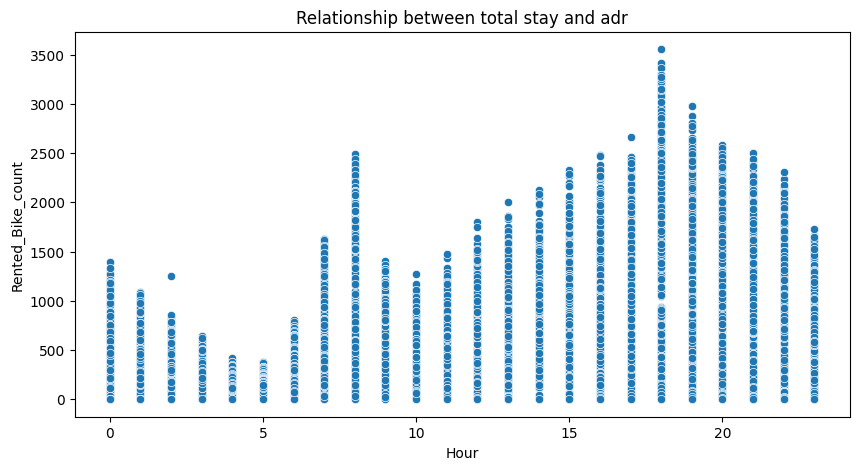

In [132]:
# Pair Plot visualization code

#Creating scatter plot by defining size,plot values and title
plt.figure(figsize=(10,5))
sns.scatterplot(x=bike_df['Hour'],y=bike_df['Rented_Bike_count'])
plt.title('Relationship between total stay and adr')
plt.show()

## ***5. Feature Engineering & Data Pre-processing***

In [19]:
#Assign all categorical features to variable
categorical_features = list(bike_df.select_dtypes(['object','category']).columns)
categorical_features = pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekday/weekend'],
      dtype='object')

**Creating Dummy Variables**

We are creating the dummy variables,because dataset may contain various type of values. It may consists of numerical, object and categorical values. So, in-order to use those categorical value for programming efficiently we have to dummify.

**One Hot Encoding**

one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

**One hot encoding**

In [133]:
#Creating the copy to move forward with feature engineering
copy_bike_df = bike_df

def one_hot_encoding(data,column):
  data = pd.concat([data,pd.get_dummies(data[column],prefix=column,drop_first=True)],axis=1)
  data = data.drop([column],axis=1)
  return data

for col in categorical_features:
  copy_bike_df = one_hot_encoding(copy_bike_df,col)

In [134]:
copy_bike_df.head()

,Rented_Bike_count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday/weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Data Splitting

In [135]:
# Assigning X and Y values
x = copy_bike_df.drop(columns=['Rented_Bike_count'],axis=1)
y = np.sqrt(copy_bike_df['Rented_Bike_count'])

In [136]:
x.head(2)

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday/weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [137]:
y.head(2)

0    15.937377
1    14.282857
Name: Rented_Bike_count, dtype: float64

##**Splitting Training and Test dataset**

* **In any ML model buliding, splitting the dataset is important part. Here the entire dataset divided into two parts some portions to training dataset and small amount to test dataset.**

* **Training dataset is used to train the model and Test dataset used to evaluate the performance of the model.**

* **Mostly the proportion of the split is 80:20 for training and testing respectively. Here we have split the dataset in the ratio of 70:30.**

In [138]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
print(x_train.shape)
print(x_test.shape)

(6132, 47)
(2628, 47)


In [139]:
copy_bike_df.columns

Index(['Rented_Bike_count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_Day_Yes',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'weekday/weekend_1'],
      dtype='object')

## ***6. ML Model Implementation***

### ML Model - 1 (Linear Regression)

##**Linear Regression**

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable. In case of single variable, the formula is same as straight line equation having an intercept and slope.

$$ \text{y_pred} = \beta_0 + \beta_1x$$

where $$\beta_0 \text{ and } \beta_1$$ are intercept and slope respectively.

In case of multiple features the formula translates into:

$$ \text{y_pred} = \beta_0 + \beta_1x_1 + \beta_2x_2 +\beta_3x_3 +.....$$

where x_1,x_2,x_3 are the features values and
$$\beta_0,\beta_1,\beta_2.....$$
 are weights assigned to each of the features. These become the parameters which the algorithm tries to learn using Gradient descent.

Gradient descent is the process by which the algorithm tries to update the parameters using  a loss function . Loss function is nothing but the diffence between the actual values and predicted values(aka error or residuals). There are different types of loss function but this is the simplest one. Loss function summed over all observation gives the cost functions. The role of gradient descent is to update the parameters till the cost function is minimized i.e., a global minima is reached. It uses a hyperparameter 'alpha' that gives a weightage to the cost function and decides on how big the steps to take. Alpha is called as the learning rate. It is always necesarry to keep an optimal value of alpha as high and low values of alpha might make the gradient descent overshoot or get stuck at a local minima.

There are also some basic assumptions that must be fulfilled before implementing this algorithm. They are:

1. **Linearity** : The independent and dependent variables have a linear relationship with one another. This implies that changes in the dependent variable follow those in the independent variable(s) in a linear fashion.

2. **Independence** : The observations in the dataset are independent of each other. This means that the value of the dependent variable for one observation does not depend on the value of the dependent variable for another observation.

3. **Homoscedasticity** : Across all levels of the independent variable(s), the variance of the errors is constant. This indicates that the amount of the independent variable(s) has no impact on the variance of the errors.

4. **Normality** : The errors in the model are normally distributed.

5. **No multicollinearity** : There is no high correlation between the independent variables. This indicates that there is little or no correlation between the independent variables.

In [140]:
# ML Model - 1 Implementation

# Fit the Algorithm
reg = LinearRegression().fit(x_train,y_train)
# Predict on the model
reg.score(x_train,y_train)

0.7927671878657921

In [141]:
reg.coef_

array([ 4.64051361e-01, -1.06823302e-01,  1.31076198e-02,  6.94149652e-04,
        8.73993552e-01, -5.13525132e+00, -1.99261448e-01, -2.39104531e+00,
       -5.06576434e+00, -7.19741660e+00, -9.67242679e+00, -9.24150436e+00,
       -4.17849800e+00,  2.01957080e+00,  7.33622440e+00,  1.44773630e+00,
       -3.03657535e+00, -3.16470021e+00, -2.10376055e+00, -2.31714987e+00,
       -2.53157145e+00, -1.27044085e+00,  7.65027976e-01,  4.33232935e+00,
        1.06300265e+01,  7.12088466e+00,  5.89138127e+00,  6.22011177e+00,
        4.99188704e+00,  1.30599804e+00, -9.46178522e+09, -2.56933973e+10,
       -1.10601336e+10,  3.55655123e+00,  2.83696317e+01, -5.32306315e-01,
       -1.59834835e+09, -1.59834835e+09, -1.59834835e+09,  1.46332637e+10,
        1.46332637e+10,  1.46332637e+10, -1.10601336e+10, -1.10601336e+10,
       -1.10601336e+10,  2.04619923e+00, -1.34086139e+00])

In [142]:
#Get the X_train and X_test value
y_pred_train = reg.predict(x_train)
y_pred_test = reg.predict(x_test)

In [143]:
#Calculate MSE
MSE = mean_squared_error(y_train,y_pred_train)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_train,y_pred_train)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_train,y_pred_train)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_train,y_pred_train))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)


MSE : 32.23558370845367
RMSE : 5.677638920224997
MAE : 4.303873641026648
r2_score : 0.7927671878657921
Adjusted R2 : 0.7889920164819519


* From the results of train dataset, It's r2 score value is 0.77 that means our model is able to capture most of the data variance.
* Lets save it in a dataframe for later comparisons and we are doing the same for all models.

In [144]:
#Storing the metric values in a dataframe
dict1 = {'Model' : 'Linear Regression',
         'MSE' : round(MSE,3),
         'RMSE' : round(RMSE,3),
         'MAE' : round(MAE,3),
         'r2_Score' : round(R2,3),
         'Adjusted R2' : round(adjusted_r2_score,3)
}
training_df = pd.DataFrame(dict1,index=[1])

In [145]:
#Calculate MSE
MSE = mean_squared_error(y_test,y_pred_test)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_test,y_pred_test)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_test,y_pred_test)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_test,y_pred_test))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)


MSE : 31.268420231412353
RMSE : 5.591817256618134
MAE : 4.275743370796181
r2_score : 0.7964270188405034
Adjusted R2 : 0.792718518796125


* Here our test dataset's r2_score is 0.78. This means our linear model is performing well on both train and test dataset.

In [146]:
#For comparing the values, we are storing the metric values in a dataframe
dict2 = {'Model' : 'Linear Regression',
         'MSE' : round(MSE,3),
         'RMSE' : round(RMSE,3),
         'MAE' : round(MAE,3),
         'r2_Score' : round(R2,3),
         'Adjusted R2' : round(adjusted_r2_score,3)
}
test_df = pd.DataFrame(dict2,index=[1])

###**Now we create a chart to visualize our residuals and see if there is heteroscedasticity(unequal variance/scatter).**

**Heteroscadicity** - It refers to a situation where the variance of the errors (residuals) is not constant across all levels of the independent variable(s) in a regression model.This violates one of the assumptions of linear regression, which is that the variance of the errors should be constant (homoscedastic) for all levels of the independent variable(s). If the plot shows a funnel shape, with the spread of residuals increasing or decreasing as the predicted values increase, this is an indication of heteroscedasticity.

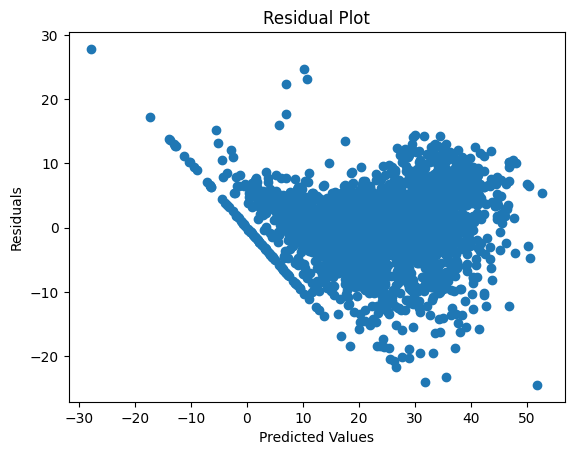

In [147]:
#Heteroscadacity - Residual Plot
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel("Predicted Values")
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

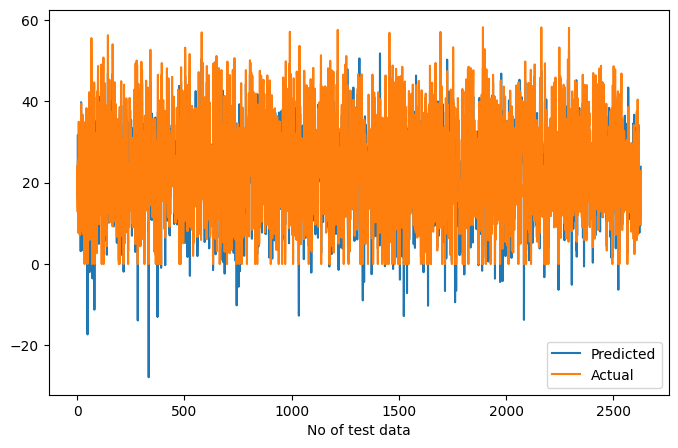

In [148]:
#Actual vs Prediction for Linear Regression Plot
plt.figure(figsize=(8,5))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'])
plt.xlabel('No of test data')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [149]:
# Visualizing evaluation Metric Score chart
result = pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

,,Model,MSE,RMSE,MAE,r2_Score,Adjusted R2
Training set,1,Linear Regression,32.236,5.678,4.304,0.793,0.789
Test set,1,Linear Regression,31.268,5.592,4.276,0.796,0.793


#### 2. Cross- Validation & Hyperparameter Tuning

In [150]:
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

In [151]:
# creating a KFold object with 5 splits
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(2, 40))}]

# specify model
lm = LinearRegression()
lm.fit(x_train, y_train)
rfe = RFE(lm)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe,
                        param_grid = hyper_params,
                        scoring= 'r2',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(x_train, y_train)


Fitting 5 folds for each of 38 candidates, totalling 190 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19, 20, 21, 22, 23, 24,
                                                   25, 26, 27, 28, 29, 30, 31, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [152]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.647964,0.151662,0.007136,0.002732,2,{'n_features_to_select': 2},0.183411,0.109775,0.102851,0.108878,...,0.139891,0.040301,38,0.195515,0.118229,0.082258,0.118068,0.207332,0.144280,0.048607
1,0.353100,0.028756,0.003613,0.000123,3,{'n_features_to_select': 3},0.191661,0.123686,0.117342,0.127439,...,0.151558,0.035392,37,0.216891,0.135425,0.107510,0.134077,0.220972,0.162975,0.046779
2,0.358846,0.025676,0.003509,0.000012,4,{'n_features_to_select': 4},0.199667,0.191633,0.147511,0.192415,...,0.189988,0.023374,36,0.222251,0.191753,0.132714,0.191191,0.227751,0.193132,0.033771
3,0.377541,0.031393,0.003581,0.000043,5,{'n_features_to_select': 5},0.205649,0.222787,0.173912,0.226023,...,0.210524,0.019714,35,0.226974,0.223847,0.156517,0.222674,0.232917,0.212586,0.028258
4,0.345143,0.021705,0.006761,0.006296,6,{'n_features_to_select': 6},0.206414,0.222941,0.202065,0.227052,...,0.217292,0.010879,34,0.226854,0.223800,0.180443,0.222305,0.236700,0.218020,0.019446
5,0.343906,0.027331,0.003583,0.000125,7,{'n_features_to_select': 7},0.212967,0.225438,0.223659,0.233518,...,0.225079,0.006964,33,0.231388,0.229428,0.199756,0.231923,0.239573,0.226414,0.013769
6,0.632173,0.145897,0.014097,0.005325,8,{'n_features_to_select': 8},0.216873,0.232948,0.246723,0.241367,...,0.233832,0.010179,32,0.234818,0.231923,0.221385,0.235963,0.244540,0.233726,0.007466
7,0.351449,0.029443,0.006218,0.002024,9,{'n_features_to_select': 9},0.217392,0.233096,0.264216,0.241078,...,0.236800,0.015710,31,0.233985,0.231698,0.241109,0.235945,0.249691,0.238486,0.006407
8,0.343852,0.022944,0.005301,0.002129,10,{'n_features_to_select': 10},0.222694,0.246980,0.264144,0.245033,...,0.241329,0.014810,30,0.244897,0.239667,0.240538,0.239883,0.249657,0.242929,0.003867
9,0.346770,0.010513,0.005639,0.001890,11,{'n_features_to_select': 11},0.219326,0.249032,0.265055,0.251788,...,0.242578,0.016697,28,0.251316,0.244936,0.240349,0.243992,0.249660,0.246051,0.003968


In [153]:
#Get the X_train and X_test value
y_pred_train_lr_cv = model_cv.predict(x_train)
y_pred_test_lr_cv = model_cv.predict(x_test)

In [154]:
#Calculating evaluation metrics on training dataset

#Calculate MSE
MSE = mean_squared_error(y_train,y_pred_train_lr_cv)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_train,y_pred_train_lr_cv)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_train,y_pred_train_lr_cv)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_train,y_pred_train_lr_cv))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)

MSE : 37.176348485775
RMSE : 6.097241055245807
MAE : 4.6599806287765615
r2_score : 0.7610045063471872
Adjusted R2 : 0.7566507124705661


In [155]:
#Calculating evaluation metrics on test dataset

#Calculate MSE
MSE = mean_squared_error(y_test,y_pred_test_lr_cv)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_test,y_pred_test_lr_cv)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_test,y_pred_test_lr_cv)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_test,y_pred_test_lr_cv))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)

MSE : 36.33753020992309
RMSE : 6.028061894997686
MAE : 4.62233441839069
r2_score : 0.7634245894720347
Adjusted R2 : 0.7591148823810214


#### **With the result of cross validation technnique and hyperparameter tuning certainly showed a result of r2 = 0.71 in training datasset and r2 = 0.73 on test dataset and mae and rmse was lowered. Overall model show good result.**

####**Regularized Linear Regression Techniques**

Ridge and Lasso's regression are a powerful technique for regularizing linear regression models and preventing overfitting. They both add a penalty term to the cost function, but with different approaches. Ridge regression shrinks the coefficients towards zero, while Lasso regression encourages some of them to be exactly zero.

### ML Model - 2 (Lasso Regression)

**Lasso regression** is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

In [156]:
#Creating Lasso Regression Model
lasso = Lasso(alpha=1.0, max_iter=3000)
lasso.fit(x_train,y_train)

Lasso(max_iter=3000)

In [157]:
#Checking the model score
print(lasso.score(x_test,y_test),lasso.score(x_train,y_train))

0.3857564290098401 0.3977040838852587


In [158]:
#Get the X_train and X_test value
y_pred_train_lasso = lasso.predict(x_train)
y_pred_test_lasso = lasso.predict(x_test)

In [159]:
#Calculate MSE
MSE = mean_squared_error(y_train,y_pred_train_lasso)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_train,y_pred_train_lasso)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_train,y_pred_train_lasso)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_train,y_pred_train_lasso))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)

MSE : 93.68864042921341
RMSE : 9.679289252275366
MAE : 7.338437937012336
r2_score : 0.3977040838852587
Adjusted R2 : 0.38673202649867233


**From the results of train dataset, It's r2 score value is 0.40 that means our model is not able to capture most of the data variance.**


In [160]:
#Storing the metric values in a dataframe
dict1 = {'Model' : 'Lasso Regression',
         'MSE' : round(MSE,3),
         'RMSE' : round(RMSE,3),
         'MAE' : round(MAE,3),
         'r2_Score' : round(R2,3),
         'Adjusted R2' : round(adjusted_r2_score,3)
}
training_df = training_df.append(dict1,ignore_index=True)

<ipython-input-160-56f2cd0d1f12>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_df = training_df.append(dict1,ignore_index=True)


In [161]:
#Calculate MSE
MSE = mean_squared_error(y_test,y_pred_test_lasso)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_test,y_pred_test_lasso)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_test,y_pred_test_lasso)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_test,y_pred_test_lasso))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)

MSE : 94.34663673326922
RMSE : 9.713219689334181
MAE : 7.383741911504226
r2_score : 0.3857564290098401
Adjusted R2 : 0.3745667205460659



**Here our test dataset's r2_score is 0.39. This means our linear model is not performing well on both train and test dataset.**

In [162]:
#Storing the metric values in a dataframe
dict2 = {'Model' : 'Lasso Regression',
         'MSE' : round(MSE,3),
         'RMSE' : round(RMSE,3),
         'MAE' : round(MAE,3),
         'r2_Score' : round(R2,3),
         'Adjusted R2' : round(adjusted_r2_score,3)
}
test_df = test_df.append(dict2,ignore_index=True)

<ipython-input-162-08d7f46720bf>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(dict2,ignore_index=True)


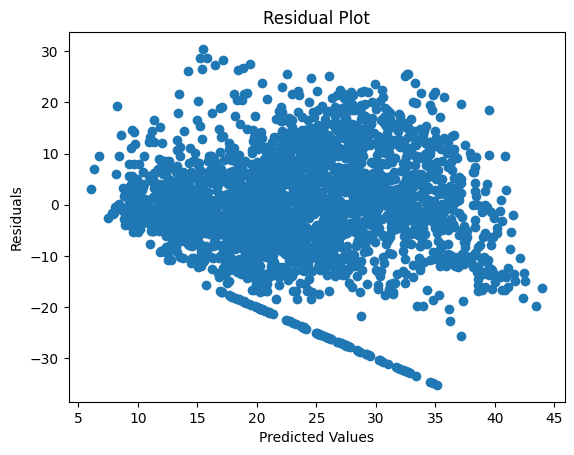

In [163]:
#Heteroscadacity - Residual Plot
plt.scatter((y_pred_test_lasso),(y_test)-(y_pred_test_lasso))
plt.xlabel("Predicted Values")
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

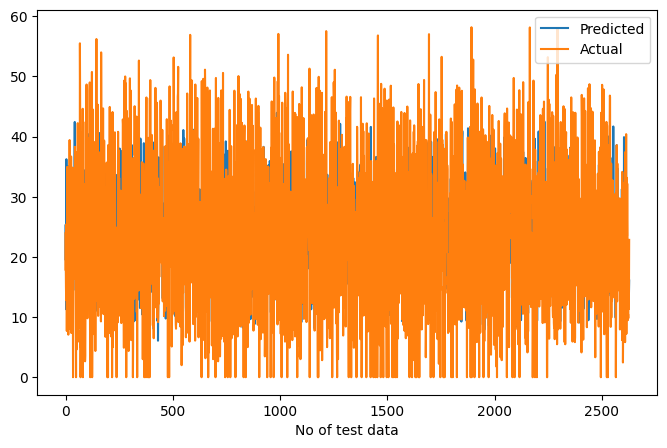

In [164]:
#Actual vs Prediction for Lasso Regression Plot
plt.figure(figsize=(8,5))
plt.plot(y_pred_test_lasso)
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'])
plt.xlabel('No of test data')
plt.show()

### ML Model - 3 (Ridge Regression)

###**Ridge Regression**

* To combat the issue of overfitting in linear regression models, ridge regression is a regularization approach. The size of the coefficients is reduced and overfitting is prevented by adding a penalty term to the cost function of linear regression. The penalty term regulates the magnitude of the coefficients in the model and is proportional to the sum of squared coefficients. The coefficients shrink toward zero when the penalty term's value is raised, lowering the model's variance.

In [165]:
# ML Model - 3 Implementation
ridge = Ridge(alpha=1.0)

# Fit the Algorithm
ridge.fit(x_train,y_train)

# Predict on the model
ridge.score(x_train,y_train)


0.7927586988945295

In [166]:
#Get the X_train and X_test value
y_pred_train_ridge = ridge.predict(x_train)
y_pred_test_ridge = ridge.predict(x_test)

In [167]:
#Calculate MSE
MSE = mean_squared_error(y_train,y_pred_train_ridge)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_train,y_pred_train_ridge)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_train,y_pred_train_ridge)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_train,y_pred_train_ridge))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)

MSE : 32.23690418922559
RMSE : 5.677755206877591
MAE : 4.305288812479533
r2_score : 0.7927586988945295
Adjusted R2 : 0.7889833728666391


**From the results of train dataset, It's r2 score value is 0.77 that means our model is able to capture most of the data variance.**

In [168]:
#Storing the metric values in a dataframe
dict1 = {'Model' : 'Ridge Regression',
         'MSE' : round(MSE,3),
         'RMSE' : round(RMSE,3),
         'MAE' : round(MAE,3),
         'r2_Score' : round(R2,3),
         'Adjusted R2' : round(adjusted_r2_score,3)
}
training_df = training_df.append(dict1,ignore_index=True)

<ipython-input-168-c780a506cdae>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_df = training_df.append(dict1,ignore_index=True)


In [169]:
#Calculate MSE
MSE = mean_squared_error(y_test,y_pred_test_ridge)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_test,y_pred_test_ridge)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_test,y_pred_test_ridge)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_test,y_pred_test_ridge))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)

MSE : 31.283596505831895
RMSE : 5.593174099367182
MAE : 4.278348984754141
r2_score : 0.7963282137392665
Adjusted R2 : 0.7926179137569973


**Here our test dataset's r2_score is 0.78. This means our linear model is performing well on both train and test dataset.**

In [170]:
#Storing the metric values in a dataframe
dict2 = {'Model' : 'Ridge Regression',
         'MSE' : round(MSE,3),
         'RMSE' : round(RMSE,3),
         'MAE' : round(MAE,3),
         'r2_Score' : round(R2,3),
         'Adjusted R2' : round(adjusted_r2_score,3)
}
test_df = test_df.append(dict2,ignore_index=True)

<ipython-input-170-7dbdd332fc80>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(dict2,ignore_index=True)


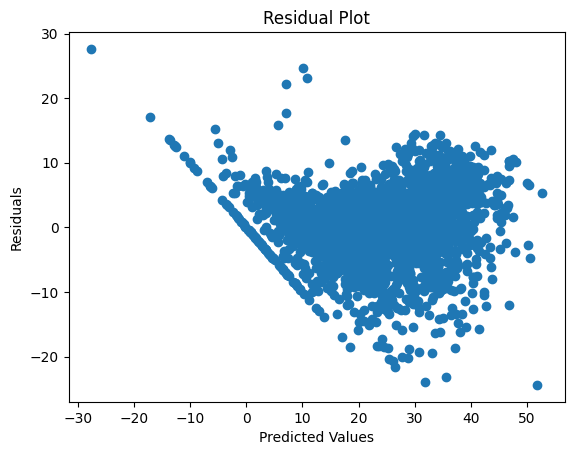

In [171]:
#Heteroscadacity - Residual Plot
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))
plt.xlabel("Predicted Values")
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

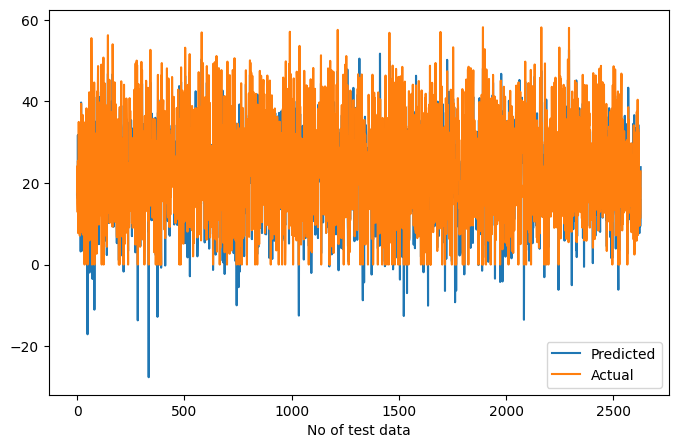

In [172]:
#Actual vs Prediction for Ridge Regression Plot
plt.figure(figsize=(8,5))
plt.plot(y_pred_test_ridge)
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'])
plt.xlabel('No of test data')
plt.show()

### ML Model - 4 (ElasticNet Regression)

###**ElasticNet Regression**

Elastic net linear regression uses the penalties from both the lasso and ridge techniques to regularize regression models. The technique combines both the lasso and ridge regression methods by learning from their shortcomings to improve the regularization of statistical models.

In [173]:
# ML Model - 4 Implementation
elasticnet = ElasticNet(alpha=0.1,l1_ratio=0.5)

# Fit the Algorithm
elasticnet.fit(x_train,y_train)

# Predict on the model
elasticnet.score(x_train,y_train)

0.6449065725179092

In [174]:
#Get the X_train and X_test value
y_pred_train_elasticnet = elasticnet.predict(x_train)
y_pred_test_elasticnet = elasticnet.predict(x_test)

In [175]:
#Calculate MSE
MSE = mean_squared_error(y_train,y_pred_train_elasticnet)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_train,y_pred_train_elasticnet)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_train,y_pred_train_elasticnet)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_train,y_pred_train_elasticnet))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)

MSE : 55.235673289554164
RMSE : 7.43207059234196
MAE : 5.658178514814017
r2_score : 0.6449065725179092
Adjusted R2 : 0.6384378162808324


From the results of train dataset, It's r2 score value is 0.62 that means our model is able to capture most of the data variance.


In [176]:
#Storing the metric values in a dataframe
dict1 = {'Model' : 'Elasticnet Regression',
         'MSE' : round(MSE,3),
         'RMSE' : round(RMSE,3),
         'MAE' : round(MAE,3),
         'r2_Score' : round(R2,3),
         'Adjusted R2' : round(adjusted_r2_score,3)
}
training_df = training_df.append(dict1,ignore_index=True)

<ipython-input-176-15627a4e6750>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_df = training_df.append(dict1,ignore_index=True)


In [177]:
#Calculate MSE
MSE = mean_squared_error(y_test,y_pred_test_elasticnet)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_test,y_pred_test_elasticnet)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_test,y_pred_test_elasticnet)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_test,y_pred_test_elasticnet))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)

MSE : 56.0996270076306
RMSE : 7.48996842500892
MAE : 5.707070055463163
r2_score : 0.6347635017260567
Adjusted R2 : 0.6281099686179654


In [178]:
#Storing the metric values in a dataframe
dict2 = {'Model' : 'Elasticnet Regression',
         'MSE' : round(MSE,3),
         'RMSE' : round(RMSE,3),
         'MAE' : round(MAE,3),
         'r2_Score' : round(R2,3),
         'Adjusted R2' : round(adjusted_r2_score,3)
}
test_df = test_df.append(dict2,ignore_index=True)

<ipython-input-178-0092305fd19a>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(dict2,ignore_index=True)


Here our test dataset's r2_score is 0.62 .  This means our linear model is performing well on both train and test dataset.

We are storing the values for reference and as same as other model, we are visualizing with a chart.

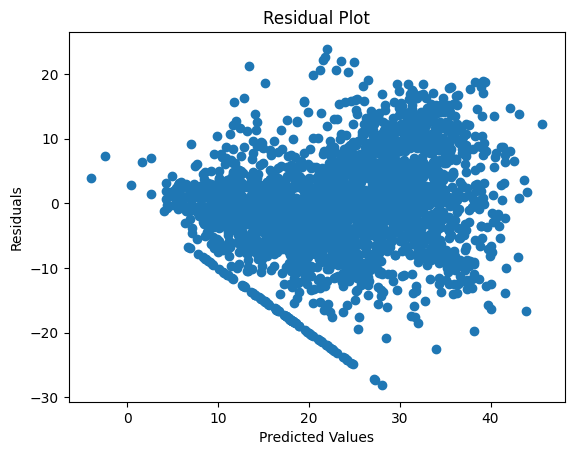

In [179]:
#Heteroscadacity - Residual Plot
plt.scatter((y_pred_test_elasticnet),(y_test)-(y_pred_test_elasticnet))
plt.xlabel("Predicted Values")
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

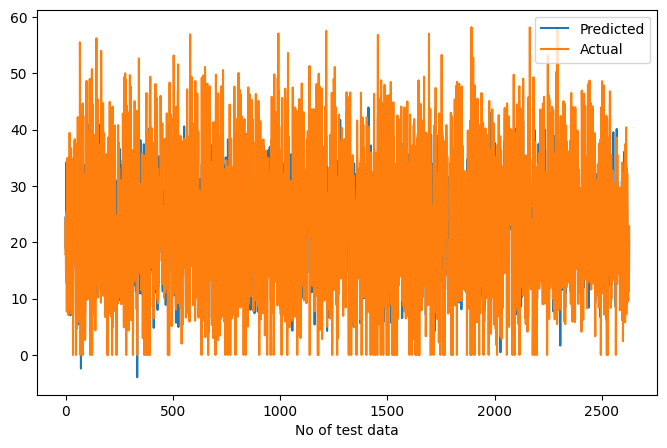

In [180]:
#Actual vs Prediction for Elasticnet Regression Plot
plt.figure(figsize=(8,5))
plt.plot(y_pred_test_elasticnet)
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'])
plt.xlabel('No of test data')
plt.show()

##**Decision Tree**

* A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

### ML Model - 5 (Decision Tree)

In [181]:
# ML Model - 5 Implementation
decision_tree = DecisionTreeRegressor(criterion='friedman_mse',max_depth=8, max_features=9, max_leaf_nodes=100)

# Fit the Algorithm
decision_tree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [182]:
#Get the X_train and X_test value
y_pred_train_dt = decision_tree.predict(x_train)
y_pred_test_dt = decision_tree.predict(x_test)

In [183]:
print(y_pred_train_dt)
print(y_pred_test_dt)

[33.96170121 33.96170121 25.76902179 ... 36.89217329 23.67002
 23.67002   ]
[17.32826922 23.67002    18.5037544  ... 10.50654102 17.14655764
 26.94093918]


In [184]:
#Calculate Model Score
Model_Score = decision_tree.score(x_train,y_train)
print('Model Score :',Model_Score)

Model Score : 0.6297835410861474


In [185]:
#Calculate MSE
MSE = mean_squared_error(y_train,y_pred_train_dt)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_train,y_pred_train_dt)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_train,y_pred_train_dt)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_train,y_pred_train_dt))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)

MSE : 57.58809876032575
RMSE : 7.588682280892102
MAE : 5.356694152278271
r2_score : 0.6297835410861474
Adjusted R2 : 0.6230392877648485


From the results of train dataset, It's r2 score value is 0.69 that means our model is able to capture most of the data variance.


In [186]:
#Storing the metric values in a dataframe
dict1 = {'Model' : 'Decision Tree',
         'MSE' : round(MSE,3),
         'RMSE' : round(RMSE,3),
         'MAE' : round(MAE,3),
         'r2_Score' : round(R2,3),
         'Adjusted R2' : round(adjusted_r2_score,3)
}
training_df = training_df.append(dict1,ignore_index=True)

<ipython-input-186-a986461f9fd1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_df = training_df.append(dict1,ignore_index=True)


In [187]:
#Calculate MSE
MSE = mean_squared_error(y_test,y_pred_test_dt)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_test,y_pred_test_dt)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_test,y_pred_test_dt)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_test,y_pred_test_dt))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)

MSE : 62.256728530343814
RMSE : 7.89029331079294
MAE : 5.58128967804736
r2_score : 0.5946777058014767
Adjusted R2 : 0.5872939275738293



Here our test dataset's r2_score is 0.63. This means our linear model is performing well on both train and test dataset.

In [188]:
#Storing the metric values in a dataframe
dict2 = {'Model' : 'Decision Tree',
         'MSE' : round(MSE,3),
         'RMSE' : round(RMSE,3),
         'MAE' : round(MAE,3),
         'r2_Score' : round(R2,3),
         'Adjusted R2' : round(adjusted_r2_score,3)
}
test_df = test_df.append(dict2,ignore_index=True)

<ipython-input-188-58f746dcd820>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(dict2,ignore_index=True)


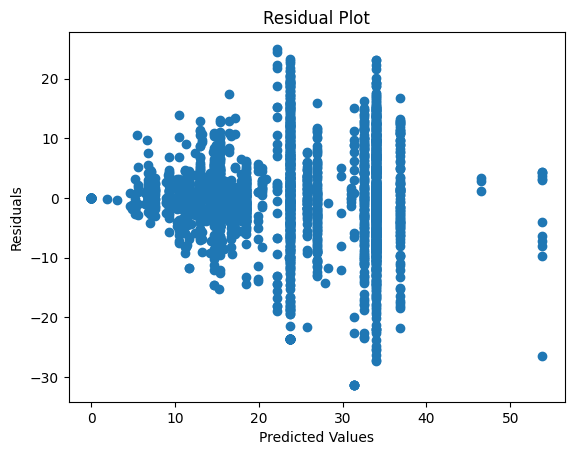

In [189]:
#Heteroscadacity - Residual Plot
plt.scatter((y_pred_test_dt),(y_test)-(y_pred_test_dt))
plt.xlabel("Predicted Values")
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

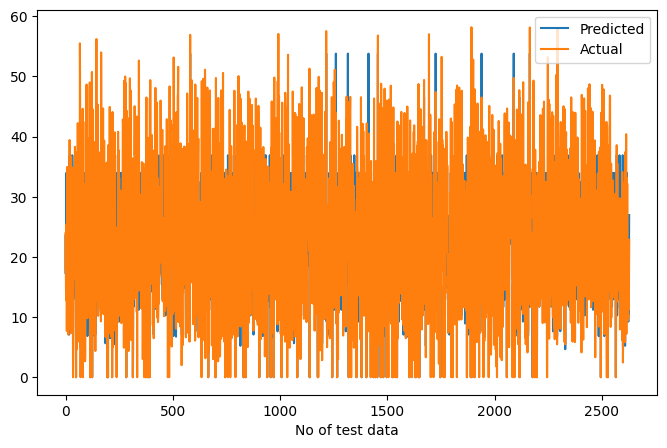

In [190]:
#Actual vs Prediction for Decision Tree Plot
plt.figure(figsize=(8,5))
plt.plot(y_pred_test_dt)
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'])
plt.xlabel('No of test data')
plt.show()

##**Random Forest**

* Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset. Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

### ML Model - 6 (Random Forest)

In [191]:
# ML Model - 6 Implementation
random_forest = RandomForestRegressor()

# Fit the Algorithm
random_forest.fit(x_train,y_train)

RandomForestRegressor()

In [192]:
#Calculate Model Score
Model_Score = random_forest.score(x_train,y_train)
print('Model Score :',Model_Score)

Model Score : 0.9890345114700543


In [193]:
#Get the X_train and X_test value
y_pred_train_rf = random_forest.predict(x_train)
y_pred_test_rf = random_forest.predict(x_test)

In [194]:
#Calculate MSE
MSE = mean_squared_error(y_train,y_pred_train_rf)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_train,y_pred_train_rf)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_train,y_pred_train_rf)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_train,y_pred_train_rf))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)

MSE : 1.7057092444522408
RMSE : 1.3060280412197285
MAE : 0.8211596262317222
r2_score : 0.9890345114700543
Adjusted R2 : 0.9888347525704777


From the results of train dataset, It's r2 score value is 0.98 that means our model is able to capture most of the data variance.


In [195]:
#Storing the metric values in a dataframe
dict1 = {'Model' : 'Random Forest',
         'MSE' : round(MSE,3),
         'RMSE' : round(RMSE,3),
         'MAE' : round(MAE,3),
         'r2_Score' : round(R2,3),
         'Adjusted R2' : round(adjusted_r2_score,3)
}
training_df = training_df.append(dict1,ignore_index=True)

<ipython-input-195-bd0c8e01a399>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_df = training_df.append(dict1,ignore_index=True)


In [196]:
#Calculate MSE
MSE = mean_squared_error(y_test,y_pred_test_rf)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_test,y_pred_test_rf)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_test,y_pred_test_rf)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_test,y_pred_test_rf))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)

MSE : 12.309327615393688
RMSE : 3.5084651366934927
MAE : 2.222290505018522
r2_score : 0.9198601496273473
Adjusted R2 : 0.9184002376244347



Here our test dataset's r2_score is 0.91. This means our linear model is performing well on both train and test dataset.

In [197]:
#Storing the metric values in a dataframe
dict2 = {'Model' : 'Random Forest',
         'MSE' : round(MSE,3),
         'RMSE' : round(RMSE,3),
         'MAE' : round(MAE,3),
         'r2_Score' : round(R2,3),
         'Adjusted R2' : round(adjusted_r2_score,3)
}
test_df = test_df.append(dict2,ignore_index=True)

<ipython-input-197-f755909b0a74>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(dict2,ignore_index=True)


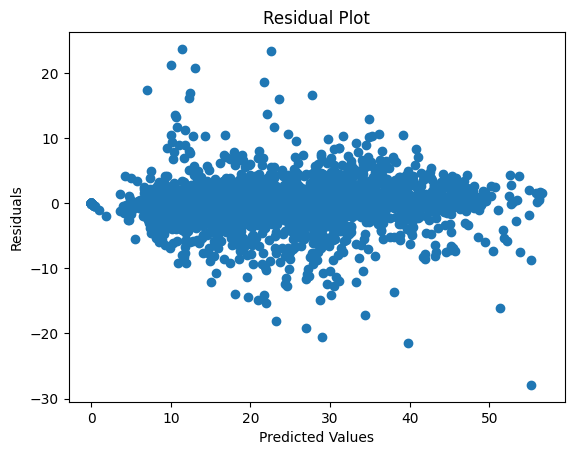

In [198]:
#Heteroscadacity - Residual Plot
plt.scatter((y_pred_test_rf),(y_test)-(y_pred_test_rf))
plt.xlabel("Predicted Values")
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

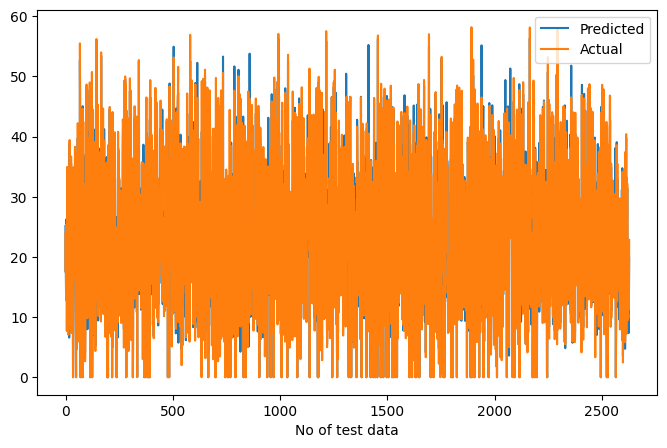

In [199]:
#Actual vs Prediction for Decision Tree Plot
plt.figure(figsize=(8,5))
plt.plot(y_pred_test_rf)
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'])
plt.xlabel('No of test data')
plt.show()

##**Gradient Boosting**

Gradient Boosting is a powerful boosting algorithm that combines several weak learners into strong learners, in which each new model is trained to minimize the loss function such as mean squared error or cross-entropy of the previous model using gradient descent.

### ML Model - 7 (Gradient Boost)

In [200]:
# ML Model - 7 Implementation
gradient_boost = GradientBoostingRegressor()

# Fit the Algorithm
gradient_boost.fit(x_train,y_train)

#Calculate Model Score
Model_Score = gradient_boost.score(x_train,y_train)
print('Model Score :',Model_Score)

Model Score : 0.8783156553704804


In [201]:
#Get the X_train and X_test value
y_pred_train_gb = gradient_boost.predict(x_train)
y_pred_test_gb = gradient_boost.predict(x_test)

In [202]:
#Calculate MSE
MSE = mean_squared_error(y_train,y_pred_train_gb)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_train,y_pred_train_gb)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_train,y_pred_train_gb)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_train,y_pred_train_gb))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)

MSE : 18.92830501558255
RMSE : 4.3506671920042965
MAE : 3.292166279849016
r2_score : 0.8783156553704804
Adjusted R2 : 0.876098925061338


From the results of train dataset, It's r2 score value is 0.87 that means our model is able to capture most of the data variance.



In [203]:
#Storing the metric values in a dataframe
dict1 = {'Model' : 'Gradient Boost',
         'MSE' : round(MSE,3),
         'RMSE' : round(RMSE,3),
         'MAE' : round(MAE,3),
         'r2_Score' : round(R2,3),
         'Adjusted R2' : round(adjusted_r2_score,3)
}
training_df = training_df.append(dict1,ignore_index=True)

<ipython-input-203-5ecb9638e3fe>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_df = training_df.append(dict1,ignore_index=True)


In [204]:
#Calculate MSE
MSE = mean_squared_error(y_test,y_pred_test_gb)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_test,y_pred_test_gb)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_test,y_pred_test_gb)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_test,y_pred_test_gb))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)

MSE : 21.05041484490206
RMSE : 4.588073108059859
MAE : 3.4886183293211745
r2_score : 0.8629513204406849
Adjusted R2 : 0.8604546972084028


Here our test dataset's r2_score is 0.86. This means our linear model is performing well on both train and test dataset.

In [205]:
#Storing the metric values in a dataframe
dict2 = {'Model' : 'Gradient Boost',
         'MSE' : round(MSE,3),
         'RMSE' : round(RMSE,3),
         'MAE' : round(MAE,3),
         'r2_Score' : round(R2,3),
         'Adjusted R2' : round(adjusted_r2_score,3)
}
test_df = test_df.append(dict2,ignore_index=True)

<ipython-input-205-9182a15355d7>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(dict2,ignore_index=True)


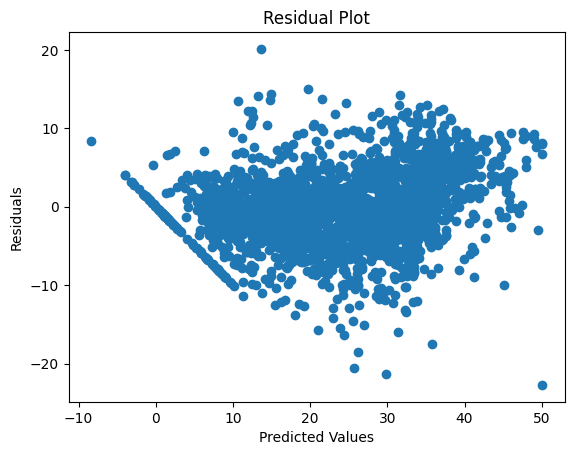

In [206]:
#Heteroscadacity - Residual Plot
plt.scatter((y_pred_test_gb),(y_test)-(y_pred_test_gb))
plt.xlabel("Predicted Values")
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

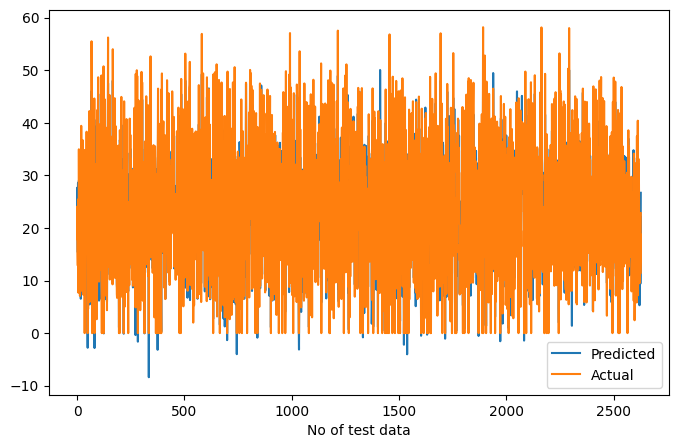

In [207]:
#Actual vs Prediction for Gradient Boost Plot
plt.figure(figsize=(8,5))
plt.plot(y_pred_test_gb)
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'])
plt.xlabel('No of test data')
plt.show()

##**Cross Validation and Hyperparameter Tuning**

* **Hyperparameter tuning** allows data scientists to tweak model performance for optimal results. This process is an essential part of machine learning, and choosing appropriate hyperparameter values is crucial for success. For example, assume you're using the learning rate of the model as a hyperparameter.

* **GridSearchCV** helps to loop through predefined hyperparameters and fit the model on the training set. So, in the end, we can select the best parameters from the listed hyperparameters.

### ML Model - 8 (Gradient Boosting with Cross Validation)

In [208]:
# ML Model - 8
# Assigning the number of trees and depth of trees
n_estimators = [50,75,100]
max_depth = [4,6,8]

# Minimum no.of samples required to split a node
min_sample_split = [50,100,150]

# Minimum no.of samples required at each leaf node
min_sample_leaf = [40,50]

#Hyperparameter Grid
parameter_dict = { 'n_estimators' : n_estimators,
                  'max_depth' : max_depth,
                   'min_sample_split' : min_sample_split,
                   'min_sample_leaf' : min_sample_leaf

}


In [209]:
parameter_dict

{'n_estimators': [50, 75, 100],
 'max_depth': [4, 6, 8],
 'min_sample_split': [50, 100, 150],
 'min_sample_leaf': [40, 50]}

In [210]:
# ML Model - 8 Implementation
#Create a instance of the GradientBoostingRegressor
gb_boost = GradientBoostingRegressor()

#Grid Search
parameter_dict = {'learning_rate':[0.1,0.01],
                  'n_estimators':[50,100],
                  'max_depth':[3,5]}

gb_grid = GridSearchCV(estimator=gb_boost,
                       param_grid=parameter_dict,
                       cv=3,verbose=2,n_jobs=-1)

gb_grid.fit(x_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             verbose=2)

In [211]:
gb_optimal_model = gb_grid.best_estimator_

In [212]:
gb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [213]:
#Get the X_train and X_test value
y_pred_train_gboost = gb_optimal_model.predict(x_train)
y_pred_test_gboost = gb_optimal_model.predict(x_test)

In [214]:
#Calculate MSE
MSE = mean_squared_error(y_train,y_pred_train_gboost)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_train,y_pred_train_gboost)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_train,y_pred_train_gboost)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_train,y_pred_train_gboost))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)

MSE : 8.763437795849214
RMSE : 2.9603104222106866
MAE : 2.133421068080299
r2_score : 0.9436625105094412
Adjusted R2 : 0.9426362074063186


From the results of train dataset, It's r2 score value is 0.94 that means our model is able to capture most of the data variance.



In [215]:
#Storing the metric values in a dataframe
dict1 = {'Model' : 'Gradient Boost with Cross Validation',
         'MSE' : round(MSE,3),
         'RMSE' : round(RMSE,3),
         'MAE' : round(MAE,3),
         'r2_Score' : round(R2,3),
         'Adjusted R2' : round(adjusted_r2_score,3)
}
training_df = training_df.append(dict1,ignore_index=True)

<ipython-input-215-d37b0da29719>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_df = training_df.append(dict1,ignore_index=True)


In [216]:
#Calculate MSE
MSE = mean_squared_error(y_test,y_pred_test_gboost)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_test,y_pred_test_gboost)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_test,y_pred_test_gboost)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_test,y_pred_test_gboost))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)

MSE : 13.478662185652553
RMSE : 3.6713297571387606
MAE : 2.6294445151390398
r2_score : 0.9122471994789636
Adjusted R2 : 0.910648601950092


Here our test dataset's r2_score is 0.91. This means our linear model is performing well on both train and test dataset.

In [217]:
#Storing the metric values in a dataframe
dict2 = {'Model' : 'Gradient Boost with Cross Validation',
         'MSE' : round(MSE,3),
         'RMSE' : round(RMSE,3),
         'MAE' : round(MAE,3),
         'r2_Score' : round(R2,3),
         'Adjusted R2' : round(adjusted_r2_score,3)
}
test_df = test_df.append(dict2,ignore_index=True)

<ipython-input-217-8c953e0a7088>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(dict2,ignore_index=True)


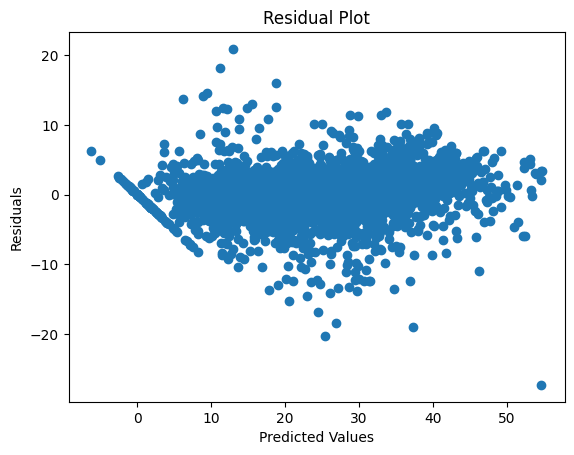

In [218]:
#Heteroscadacity - Residual Plot
plt.scatter((y_pred_test_gboost),(y_test)-(y_pred_test_gboost))
plt.xlabel("Predicted Values")
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

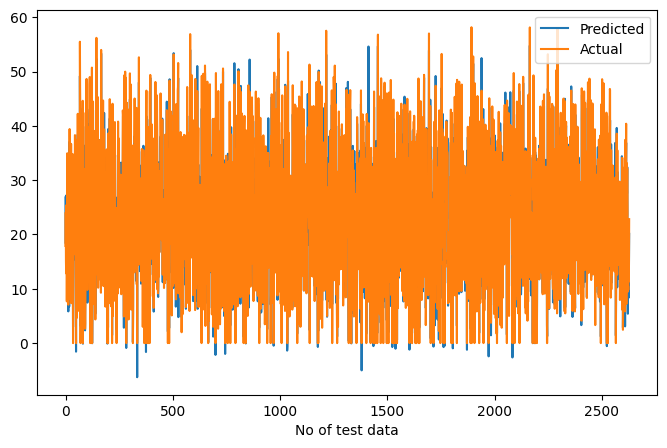

In [219]:
#Actual vs Prediction for Gradient Boost Plot
plt.figure(figsize=(8,5))
plt.plot(y_pred_test_gboost)
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'])
plt.xlabel('No of test data')
plt.show()


###**Importance of Features**

* In addition to evaluating the performance of our model on the test data, we tried to understand the impact of individual features on the model's performance.



In [220]:
gb_optimal_model.feature_importances_

array([3.02521671e-01, 1.60421769e-01, 2.54633971e-03, 3.48678303e-03,
       3.71189050e-02, 4.42103244e-02, 8.99083706e-04, 7.87277967e-04,
       7.11539805e-03, 1.72056057e-02, 2.83112802e-02, 2.35838274e-02,
       5.00015753e-03, 4.67746114e-03, 1.02561360e-02, 3.98026298e-04,
       2.90917979e-03, 1.60786253e-03, 2.01182801e-04, 1.06142407e-04,
       1.78908509e-04, 1.05405035e-04, 1.12099262e-03, 8.50555181e-03,
       3.16284699e-02, 1.84046635e-02, 1.15201589e-02, 1.59413583e-02,
       9.82582887e-03, 1.29063750e-03, 1.66039555e-03, 6.75042342e-04,
       2.34190044e-02, 3.61926861e-03, 1.70282466e-01, 7.66387910e-06,
       1.57238155e-03, 5.10721859e-04, 1.44499707e-03, 4.46209441e-03,
       3.85796829e-04, 4.97131335e-03, 2.35497586e-04, 7.55460648e-03,
       5.45220877e-03, 1.16675699e-03, 2.06933959e-02])

In [221]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(x_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [222]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [223]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.30
34,Functioning_Day_Yes,0.17
1,Humidity,0.16
4,Solar_Radiation,0.04
5,Rainfall,0.04
24,Hour_18,0.03
10,Hour_4,0.03
11,Hour_5,0.02
32,Seasons_Winter,0.02
27,Hour_21,0.02


In [224]:
gb_boost.fit(x_train,y_train)

GradientBoostingRegressor()

In [225]:
features = x_train.columns
importances = gb_boost.feature_importances_
indices = np.argsort(importances)

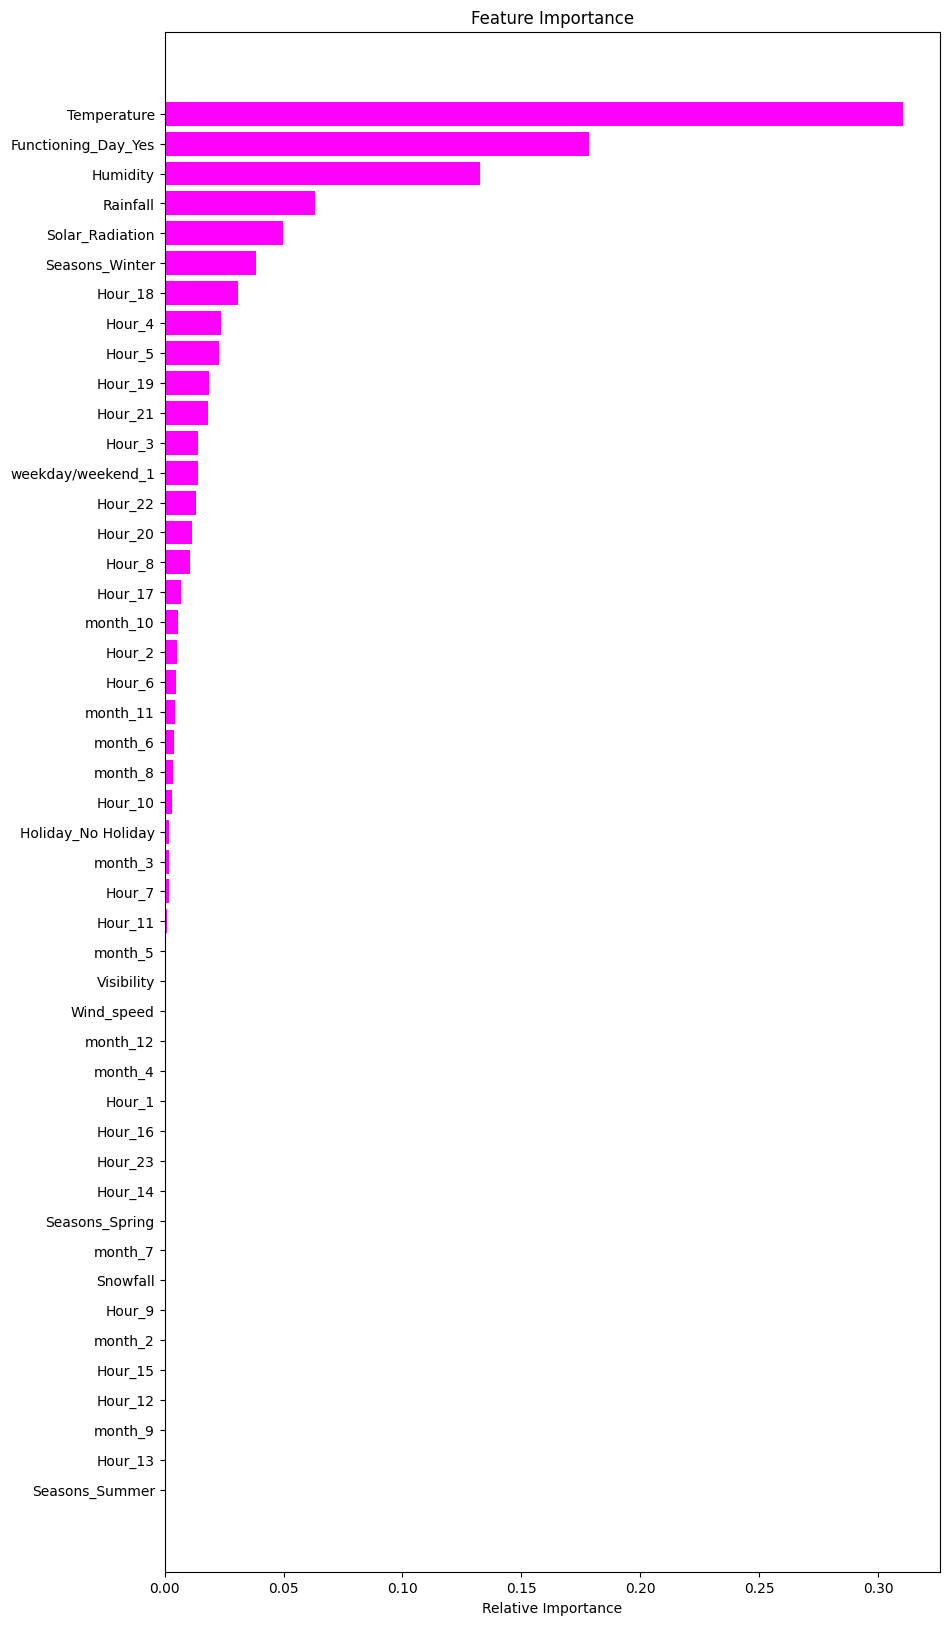

In [226]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices],  color='magenta',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

**From the aboue study, we found that the temperature as well as weather and seasonality features, had the greatest impact on bike demand. Other than that remaining columns have less impact to the result of the model.**

# **Conclusion**

* In this ML model building process, we have followed all mandatory steps starting from data cleaning and processing then we have visualized the relations of columns using charts. This whole cycle is known as EDA (Exploratory Data Analysis).

* Next we applied necessary transformations on dependent variable "Rented_Bike_count" which is our result variable. Then we also studied the characteristics of numerical variables, next we have calculated their correlations, distribution and the their relationships with the dependent variable. Additionally we removed some numerical features that contained mostly 0 values and applied one-hot encoding to the categorical variables.

* After doing all these processing steps, we have seperated the dataset into train and test data. Subsequently, we employed multiple machine learning algorithms into training data to model and then implemented on test data to predict.

* Models which we tried are Linear Regression, Lasso Regression, Ridge Regression, Elastic Net Regression, Decision Tree, Random Forest and Gradient Booster. We also tried cross validation approach and performed hyperparameter tuning on Linear Regression and Grandient Boost models to enhance the performance of those models.

* Outcome of our models are evaluated based on various evaluation metrics, Comparision of results from all of our models are listed in a table below :


In [227]:
#Viewing the entire evaluation metrics of all models
conclusion = pd.concat([training_df,test_df],keys=['Training set','Test set'])
conclusion

Model     MSE   RMSE    MAE  \
Training set 0                     Linear Regression  32.236  5.678  4.304   
             1                      Lasso Regression  93.689  9.679  7.338   
             2                      Ridge Regression  32.237  5.678  4.305   
             3                 Elasticnet Regression  55.236  7.432  5.658   
             4                         Decision Tree  57.588  7.589  5.357   
             5                         Random Forest   1.706  1.306  0.821   
             6                        Gradient Boost  18.928  4.351  3.292   
             7  Gradient Boost with Cross Validation   8.763  2.960  2.133   
Test set     0                     Linear Regression  31.268  5.592  4.276   
             1                      Lasso Regression  94.347  9.713  7.384   
             2                      Ridge Regression  31.284  5.593  4.278   
             3                 Elasticnet Regression  56.100  7.490  5.707   
             4                         Decision Tree  62.257  7.890  5.581   
             5                         Random Forest  12.309  3.508  2.222   
             6                        Gradient Boost  21.050  4.588  3.489   
             7  Gradient Boost with Cross Validation  13.479  3.671  2.629   

                r2_Score  Adjusted R2  
Training set 0     0.793        0.789  
             1     0.398        0.387  
             2     0.793        0.789  
             3     0.645        0.638  
             4     0.630        0.623  
             5     0.989        0.989  
             6     0.878        0.876  
             7     0.944        0.943  
Test set     0     0.796        0.793  
             1     0.386        0.375  
             2     0.796        0.793  
             3     0.635        0.628  
             4     0.595        0.587  
             5     0.920        0.918  
             6     0.863        0.860  
             7     0.912        0.911

These results are purely based on the values of the provided dataset. It is important to note that the data is time-dependent and variables such as temperature, windspeed and solar radiation may not always remain consistent. In real world there may be situations where the model fails to perform well.
To reduce that risk factor we need to constantly evolve in the field of Machine Learning.

 We train a model to predict the demand of rented bike count with all given factors. From the whole process, we got some conclusions on each steps. They are,

* From the numerical analysis, we found that demand of rented bikes are high in office travelling times that is 8-9 AM in the morning and 6 - 7pm in the evening.

* People prefer the rented bike more in Sunny days when compared to snowfall and rainy days. Likewise demand is high in Summer Seasons.

* Out of all models we have built, Gradient Boosting Model with Cross validation approach (GridSearchcv) shows most promising result with R2 score of 0.91 in the test dataset. Hence it can be the feasible one to solve this kind of problem.

* Features which has more impact on data will be the driving factors in the result. Some of those features are Temperatue, Functioning_Day_Yes, Humidity, Rainfall and Solar radiation.




### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***